In [4]:
from collections import Counter

In [2]:
import aerospike
config = {
    'hosts': [('35.228.136.58', 3000)]
}
client = aerospike.client(config).connect()
data_as_key = ("ids_to_validate", "data", "data")


# tags_data = client.get(bert_data_key)[-1]
# labels_for_train = tags_data["gutenTag"]
# print(len(labels_for_train))
bert_data_key = ("ids_to_validate", "data", "bert_tags")

tags_dictionary = client.get(data_as_key)[-1]['tags']
guten_tag_labels = client.get(bert_data_key)[-1]["gutenTag"]
categories_tag_labels = client.get(bert_data_key)[-1]["categories_tags"]

TimeoutError: (9, 'Client timeout: socket=30000 total=1000 iterations=1 lastNode=35.228.136.58:3000', 'src/main/client/get.c', 113, False)

In [5]:
import pandas as pd
import bson
import pymongo
from tqdm import tqdm
username = "tagger-admin"
password = "tvaiadmin"
db_client = pymongo.MongoClient('104.198.62.226', username=username,
                                password=password,
                                authSource='tags',
                                authMechanism='SCRAM-SHA-256', port=27017).tags

NameError: name 'data_as_key' is not defined

In [5]:
weak_tags = cat_tags[cat_tags[1]<=100].sort_values(by=[1])
weak_tags

,0,1
265,blue economy,1
262,esports,1
264,nanotechnology,1
263,spin-off,1
261,neuroscience,2
...,...,...
115,pharmaceutical industry,94
114,legal,94
113,innovation,95
112,app,96


In [6]:
weak_tags[0].values

array(['blue economy', 'esports', 'nanotechnology', 'spin-off',
       'neuroscience', 'sharing economy', 'sheep', 'biometrics',
       'digital health', 'quantum computing', 'insider activity',
       'packaging', 'smart home', 'mobile gaming', 'saas',
       'augmented reality', 'refugees', 'vegetarianism', 'recycling',
       'autonomous vehicles', '3d printing', 'drones', 'tuberculosis',
       'obesity', 'iot', 'urbanization', 'telemedicine', 'sustainability',
       'crowdfunding', 'aids', 'deflation', 'sanctions',
       'quantitative tightening', 'diabetes', 'teens', 'machine learning',
       'football', 'charity', 'virtual reality', 'genetics',
       'car sharing', 'jewelry', 'psychology', 'plastics', '5g',
       'biofuel', 'building materials', 'smart speaker', 'unicorns',
       'fmcg', 'pension funds', 'home & decor', 'mid caps', 'guns',
       'virtual assistant', 'wearables', 'blockchain',
       'intellectual property', 'books', 'esg', 'student loan',
       'auto loa

In [7]:
import re

In [8]:
def find_by_word(text):
    tags_found = []
    for row in weak_tags[0].values:
        if re.search(" "+ row + " ", text):
            tags_found.append(row)
    return tags_found

In [9]:
def find_by_model(model):
    return list(set(weak_tags[0].values).intersection(set(model)))

In [10]:
data_for_check = []
db = db_client["tweets_pipeline_v2"].find({"$or":[
#                                                     {"status": "pipelined"},                                                                                                                        
                                                      {"status": "reserved"},                                                       
                                                 ],
                                                   "extracted_text": {"$exists": True},                                               
#                                                'tweet_timestamp': {'$gte': datetime(2020,2,4)} #algoStarts                                              
                                          }, no_cursor_timeout=True)


for i in tqdm(db, total = db.count()):
    _id = str(i["_id"])
    text = i["extracted_text"].lower()    
    if len(text) > 0:
        tags_found = []
        tags_found += find_by_word(text)
        tags_found += find_by_model(i["bert_tags"])
        tags_found = list(set(tags_found))
        if tags_found:
            data_for_check.append([_id, tags_found])

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 13882/13882 [00:04<00:00, 3070.90it/s]


In [11]:
data_for_check = pd.DataFrame(data_for_check)

In [12]:
data_for_check

,0,1
0,5dd12d5eedee5484619cc2bc,[data]
1,5dd12d8dedee5484619cc2ea,[futures]
2,5dd1320bedee5484619cc42e,[futures]
3,5dd163f6e008481920c29ea1,"[life expectancy, data]"
4,5dd1a081ff336ebb4bcdd4ed,[data]
...,...,...
3855,5ed9355537768501d68044e5,[venture]
3856,5ed935ad17e2d04e95d95663,[data]
3857,5ed93686ecd46cf6e2b98666,[high yield]
3858,5ed939abb8da5454053954c3,[batteries]


In [13]:
collector = []
for row in data_for_check[1].values:
    collector += row

In [14]:
counterDict = dict(Counter(collector).most_common())
counterDict

{'data': 1139,
 'volatility': 139,
 'futures': 137,
 'high yield': 133,
 'cryptocurrency': 128,
 'migration': 127,
 'payments': 108,
 'bubble': 107,
 'venture': 107,
 'wind power': 104,
 'deficit': 88,
 'fintech': 85,
 'bull market': 82,
 'nuclear power': 78,
 'startups': 76,
 'dividends': 75,
 'children': 74,
 'app': 72,
 'innovation': 71,
 'crimes': 69,
 'brexit': 66,
 'hedge funds': 66,
 'savings': 66,
 'hydro': 65,
 'bear market': 63,
 'materials': 61,
 'war': 56,
 'poverty': 53,
 'legal': 51,
 'credit card': 49,
 'software': 48,
 'ipo': 47,
 'millennials': 46,
 'logistics': 42,
 'infrastructure': 41,
 'batteries': 39,
 'tariffs': 39,
 'apparel': 39,
 'default': 38,
 'nonfarm payrolls': 38,
 'm&a': 38,
 'mobile payments': 37,
 'water': 34,
 'small caps': 34,
 'buyback': 34,
 'wireless': 33,
 'student loan': 33,
 'retirement': 33,
 'blockchain': 33,
 'meat': 32,
 'restaurants': 31,
 'boomers': 30,
 'quantitative easing': 30,
 'music': 28,
 'social justice': 28,
 'delivery': 26,
 'ra

In [15]:
def apply_tag_summator(tags):
    summator = 0
    for tag in tags:
        summator += counterDict[tag]
    return summator

In [16]:
data_for_check["summator"] = data_for_check[1].apply(lambda x: apply_tag_summator(x))

In [17]:
data_for_check = data_for_check.sort_values(by=["summator"])
data_for_check = data_for_check.reset_index(drop=True)
data_for_check

,0,1,summator
0,5e5e6be53ac6919839ea7c5f,[esports],1
1,5ed8a5cf173ed06538360f59,[tuberculosis],1
2,5ed0b20158ccd446da68c5a1,[insider activity],1
3,5e047ad093eef01521fe8bc0,[fmcg],2
4,5ed2738edc12488afcde2db8,[drones],2
...,...,...,...
3855,5ed1eace84351bc0048edfda,"[bear market, bull market, data, futures]",1421
3856,5df009188e6f3b7ab270a9ca,"[futures, bull market, data, hedge funds]",1424
3857,5ed0bcd205408ab6a9726f52,"[m&a, venture, startups, data, fintech]",1445
3858,5ecf6ef9b66676166af63249,"[bankruptcy, war, savings, bubble, brexit, data]",1446


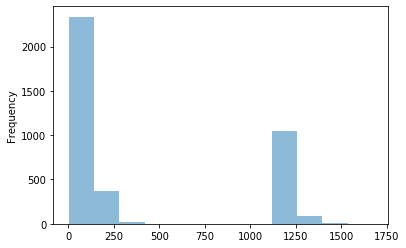

In [18]:
data_for_check["summator"].plot.hist(bins=12, alpha=0.5)

In [19]:
data_for_check_weak = data_for_check[data_for_check["summator"] <= 100]
data_for_check_weak

,0,1,summator
0,5e5e6be53ac6919839ea7c5f,[esports],1
1,5ed8a5cf173ed06538360f59,[tuberculosis],1
2,5ed0b20158ccd446da68c5a1,[insider activity],1
3,5e047ad093eef01521fe8bc0,[fmcg],2
4,5ed2738edc12488afcde2db8,[drones],2
...,...,...,...
1592,5ed8081d977dad7d1a7ea2fd,"[boomers, generation x, millennials, generatio...",100
1593,5ed82b27977dad7d1a7ea306,"[app, shopping, lifestyle]",100
1594,5ed325ab325e55cffb3c7448,"[small caps, hedge funds]",100
1595,5ecf0a474b10365c8882c9a0,"[app, music]",100


In [20]:
def weakTag(bson_id):
#     print(bson_id)
#     print("BEFORE:", db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(bson_id)})["status"])
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(bson_id)},
                                        {"$set":{"weakTag":True}})
#     print("AFTER:", db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(bson_id)})["status"])

In [21]:
for index, row in data_for_check_weak.iterrows():
    _id = row[0]
    weakTag(_id)

KeyboardInterrupt: 

In [20]:
from datetime import datetime

In [2]:
# def weak_tag_to_validated(bson_id, new_list):
#     db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(bson_id)},
#                                     {"$set":{"status": "validated",
#                                              "validated_timestamp": datetime.now(),
#                                              "confirmed_after_validate": new_list,
#                                              'source': 'def',
#                                     }})    

In [3]:
def weak_tag_to_pipelined(bson_id, new_list):
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(bson_id)},
                                    {"$set":{"status": "pipelined",
#                                              "validated_timestamp": datetime.now(),
#                                              "confirmed_after_validate": new_list,
#                                              'source': 'def',
                                    }})    

In [7]:
data_for_check = []
db = db_client["tweets_pipeline_v2"].find({"$or":[
#                                                     {"status": "pipelined"},                                                                                                                        
                                                      {"status": "reserved"},                                                       
                                                 ],
                                                   "weakTag": True,
                                                   "source": "def",
                                                   "extracted_text": {"$exists": True},                                               
#                                                'tweet_timestamp': {'$gte': datetime(2020,2,4)} #algoStarts                                              
                                          }, no_cursor_timeout=True)


for i in tqdm(db, total = db.count()):
    _id = str(i["_id"])
    print(_id)
    new_list = i["bert_tags"]
    if "entity_prepared" in i:
        new_list += i["entity_prepared"]
#     weak_tag_to_validated(_id, new_list)
    weak_tag_to_pipelined(_id, new_list)
#     break

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  del sys.path[0]
  0%|          | 5/3101 [00:00<06:42,  7.69it/s]

5df01da52d2eb8974ede6a8f
5df01da72d2eb8974ede6a93
5df022212d2eb8974ede6c3f
5df022212d2eb8974ede6c40
5df022262d2eb8974ede6c4d
5df022f8b2403dd4d9d24328
5df02423b2403dd4d9d243ac


  0%|          | 13/3101 [00:00<04:01, 12.79it/s]

5df0260f2f0683e9162f85be
5df0263617c61caa874e9e7c
5df027a617c61caa874e9f2a
5df02873b2403dd4d9d2456c
5df02f6d7d0fd77eaaabc72d
5df02fea2d2eb8974ede71b9
5df035fe8e6f3b7ab270ba65
5df037ba1f5e287ece660b36


  1%|          | 21/3101 [00:00<02:42, 18.94it/s]

5df0bc4a9bf94c6da08b43d5
5df0bc4b9bf94c6da08b43d9
5df0bc4c9bf94c6da08b43e5
5df0bc93a6d54c33cd160468
5df0bd201efb3102bc8c74da
5df0bdc81efb3102bc8c7500
5df0bdd39bf94c6da08b4427
5df0bdfd60f02242ecdd18ef


  1%|          | 29/3101 [00:00<02:03, 24.77it/s]

5df0c17fa6d54c33cd16060b
5df0c182a6d54c33cd160617
5df0c25bd421762a4e3cbf9c
5df0c2ecee8a497fd4052e46
5df0c5a442d51d76a8ed270e
5df0c91adf4bdadbb19d83be
5df0cfa5ef062c35d2ee1004
5dfa1ed099d15cdf69000d65


  1%|          | 37/3101 [00:01<01:45, 29.15it/s]

5dfa1ed099d15cdf69000d68
5dfa22f699d15cdf69000eeb
5dfa22f799d15cdf69000eef
5dfa23ca99d15cdf69000f4e
5dfa251d6e41ede2e7af71cd
5dfa270327f66a4abf0f0ad9
5dfa27dd6e41ede2e7af72ba
5dfa2c10739a8a8cf046d65f


  1%|▏         | 45/3101 [00:01<01:35, 31.99it/s]

5dfb64e5131cdf9d830ab683
5dfb653ba70263da31b2387d
5dfb65dae75f75b47f5fec2e
5dfb67e7a1a70d622e2195a1
5dfb68b926947026f2298bb0
5dfb6969131cdf9d830ab840
5dfb6ab0bd945e14a493a829
5dfb6ca2e37cc217ac91df81


  2%|▏         | 53/3101 [00:01<01:30, 33.57it/s]

5dfb6eb951e9d21cd70ec5b6
5dfb6eba51e9d21cd70ec5bc
5dfb6f8a20afaad67ff24b49
5dfb7036e8875662eea802b5
5dfb70e726947026f2298e41
5dfb70ed26947026f2298e58
5dfb722bdb2ba2d27aa21279
5dfb724d890c58587407c6c0


  2%|▏         | 61/3101 [00:01<01:28, 34.38it/s]

5dfb72fb26947026f2298ef8
5dfb731e549d26153cd66e5c
5dfb7321549d26153cd66e64
5dfb73f2521d05797e7f5bb3
5dfb73fc521d05797e7f5bd9
5dfb74e03299e003822b3267
5dfb7545d5b8219a13e7a195
5dfb7595a1a70d622e2199c1


  2%|▏         | 69/3101 [00:02<01:27, 34.81it/s]

5dfb75b03ddc87421667723d
5dfb762590b37c797d481e4d
5dfb762590b37c797d481e4e
5dfb7809131cdf9d830abdc5
5dfb7d9aeefb05db161d5263
5dfb7e206c1655c6f3d5060e
5dfb7e4cb1fdc496a209b56e
5dfb7e4cb1fdc496a209b571


  2%|▏         | 77/3101 [00:02<01:26, 34.86it/s]

5dfb7f7d513ea04cb5817ff1
5dfb7f99a58cebdca72914c5
5dfb828600057b115ae1a857
5dfb8336db2ba2d27aa2179e
5dfb836eb1fdc496a209b6f5
5dfb8498a58cebdca72915b6
5dfb84a3fc3996c4ce94eb12
5dfb85016c1655c6f3d507f2


  3%|▎         | 85/3101 [00:02<01:26, 35.04it/s]

5dfb85036c1655c6f3d507f7
5dfb85b8a1a70d622e219f0b
5dfb85d820afaad67ff2524c
5dfb85e290b37c797d4823b6
5dfb8873d5b8219a13e7a7f7
5dfb888ebd945e14a493b204
5dfb8b10131cdf9d830ac318


  3%|▎         | 93/3101 [00:02<01:25, 35.12it/s]

5dfb8b7e6c1655c6f3d509e7
5dfb8be9bd945e14a493b317
5dfb8cbdb601c13c48eeda39
5dfb8cf9521d05797e7f62a6
5dfb8ddee75f75b47f5ffb38
5dfb8de3d5b8219a13e7a9b5
5dfb8e60b1fdc496a209bbc0
5dfb8e63b1fdc496a209bbcb


  3%|▎         | 101/3101 [00:03<01:25, 35.14it/s]

5dfb9049a58cebdca72919de
5dfb906e20afaad67ff2567b
5dfb91d851e9d21cd70ed1a1
5dfb91db51e9d21cd70ed1a9
5dfb91e53ddc874216677be5
5dfb92b731f3fbd328869c37
5dfb982326947026f2299a30


  3%|▎         | 105/3101 [00:03<02:54, 17.21it/s]

5dfb9867b1fdc496a209be25
5dfb9a03e75f75b47f5fff49
5dfb9c63e37cc217ac91eed4
5dfb9c88e8875662eea81139
5dfba0bd00057b115ae1b31c
5dfba0e4eefb05db161d5ca4
5dfba124b601c13c48eedfd0
5dfba16e20afaad67ff25b50


  4%|▎         | 113/3101 [00:03<02:08, 23.28it/s]

5dfba19f890c58587407d604
5dfba2cf6c1655c6f3d51230
5dfba2f400057b115ae1b3e5
5dfba3bc6c1655c6f3d512b1
5dfba4a3bf2e0b3cf6aeb354
5dfba7b031f3fbd32886a223
5dfba7b1e37cc217ac91f15a
5dfba7e5e37cc217ac91f16a


  4%|▍         | 121/3101 [00:03<01:45, 28.13it/s]

5dfba828d5b8219a13e7b0df
5dfba8d07ce0ff01df13b42f
5dfba97820afaad67ff25e95
5dfbaa256c1655c6f3d51535
5dfbab5020afaad67ff25f2f
5dfbac0a3299e003822b42bf
5dfbac60d5b8219a13e7b245
5dfbadb6db2ba2d27aa2253b


  4%|▍         | 129/3101 [00:04<01:35, 31.28it/s]

5dfbafd51ca7a5db7fbe76cb
5dfbafe2a70263da31b24fcf
5dfbb37726947026f229a1fa
5dfbb5197ce0ff01df13b846
5dfbb705890c58587407dd0f
5dfbb83f7ce0ff01df13b950
5dfbb8b6bd9d69169e7dbd81
5dfbb959e37cc217ac91f888


  4%|▍         | 137/3101 [00:04<01:29, 33.15it/s]

5dfbba87eeece5cb78ecbe91
5dfbbdcde75f75b47f600ab1
5dfbbf06e37cc217ac91fa39
5dfbc06bcab13136285020fb
5dfbc093eeece5cb78ecc06a
5dfbc413db2ba2d27aa22bf0
5dfbc42d6c1655c6f3d51dbd
5dfbc9ab31f3fbd32886ac6a


  5%|▍         | 145/3101 [00:04<01:26, 34.18it/s]

5dfbcabc51e9d21cd70ee1ed
5dfbcac051e9d21cd70ee1fa
5dfbcad0a70263da31b258ed
5dfbcb0e9f007b135dc2988d
5dfbcb173ddc874216678ce6
5dfbcbfeeeece5cb78ecc419
5dfbcc00eeece5cb78ecc41b
5dfbcc467931d329d8fedf61


  5%|▍         | 153/3101 [00:04<01:24, 34.71it/s]

5dfbcda273157c57b827c250
5dfbd05f26947026f229ab03
5dfbd7202c7ba0b8a0d41ffb
5dfbd79a73157c57b827c3e7
5dfbd9ff3ddc874216678fef
5dfbdd5c20afaad67ff26eb1
5dfbddcceeece5cb78ecc8ea
5dfbde9aaaa9751df2224479


  5%|▌         | 161/3101 [00:05<01:24, 34.95it/s]

5dfbdf567ce0ff01df13c391
5dfbdf8ca70263da31b25e69
5dfbe6547ce0ff01df13c50b
5dfbe6557ce0ff01df13c50d
5dfbe6577ce0ff01df13c514
5dfbe807a58cebdca729322c
5dfbe807a58cebdca729322d
5dfbe80ba58cebdca729323c


  5%|▌         | 169/3101 [00:05<01:23, 35.02it/s]

5dfbea49b601c13c48eef660
5dfbeab8a70263da31b260db
5dfbeb0fe8875662eea82847
5dfbee6b26b6c18e8998aae2
5dfbef162c7ba0b8a0d4255d
5dfbf0a06e02145be6273a0a
5dfbf12dd5b8219a13e7c6fd
5dfbf12fd5b8219a13e7c703


  6%|▌         | 177/3101 [00:05<01:23, 35.15it/s]

5dfbf1be3299e003822b5727
5dfbf3ff549d26153cd69628
5dfbf4a620afaad67ff27545
5dfbf4b2eeece5cb78eccf8f
5dfbf7762e744897c1e65036
5dfbf8c3513ea04cb581a3cf
5dfbf8eebd9d69169e7dd0ba
5dfbf93f2c7ba0b8a0d4285b


  6%|▌         | 185/3101 [00:05<01:23, 35.03it/s]

5dfbf9a3db818e4cd3867b0d
5dfbf9f9bd9d69169e7dd137
5dfbfa67bf2e0b3cf6aeca56
5dfbfa6bbf2e0b3cf6aeca62
5dfbfad8aaa9751df2224b4a
5dfbfadd540e13036dd1aac6
5dfbfade540e13036dd1aacc


  6%|▌         | 193/3101 [00:06<01:22, 35.06it/s]

5dfbfb5c7931d329d8feecba
5dfbfb8e9f007b135dc2a4bd
5dfbfb8f9f007b135dc2a4c1
5dfbfbd4aaa9751df2224b9e
5dfbfbd5aaa9751df2224b9f
5dfbfca9549d26153cd69815
5dfbfd3daaa9751df2224c37
5dfbffbf31f3fbd32886bb8e


  6%|▋         | 201/3101 [00:06<01:22, 35.12it/s]

5dfbfff626b6c18e8998afbc
5dfc02fa513ea04cb581a679
5dfc02fc513ea04cb581a67e
5dfc02fd513ea04cb581a685
5dfc0300513ea04cb581a68c
5dfc0301513ea04cb581a68f
5dfc0302513ea04cb581a692
5dfc0303513ea04cb581a696


  7%|▋         | 209/3101 [00:06<01:22, 35.16it/s]

5dfc03947931d329d8feef36
5dfc03afbf2e0b3cf6aeccc5
5dfc03eb26b6c18e8998b0ba
5dfc056d521d05797e7f84d9
5dfc0571521d05797e7f84e5
5dfc0620db2ba2d27aa23c80
5dfc0622540e13036dd1ae1f
5dfc065ea70263da31b268ce


  7%|▋         | 217/3101 [00:06<01:21, 35.19it/s]

5dfc074373157c57b827cf30
5dfc0789521d05797e7f855d
5dfc0893890c58587407f503
5dfc0aaa7931d329d8fef126
5dfc0b8bb601c13c48ef0074
5dfc0b9aa58cebdca7293c47
5dfc0c2731f3fbd32886bf68
5dfc0d33521d05797e7f8710


  7%|▋         | 225/3101 [00:06<01:21, 35.22it/s]

5dfc0d5de8875662eea8311e
5dfc0ec42e744897c1e6583d
5dfc0f28b601c13c48ef0187
5dfc0f2ab601c13c48ef018e
5dfc0f3bcab13136285035c2
5dfc0f7ab601c13c48ef01ad
5dfc0f89bd9d69169e7dd70d
5dfc0f8abd9d69169e7dd710


  8%|▊         | 233/3101 [00:07<01:21, 35.23it/s]

5dfc10af890c58587407f6e5
5dfc11576a59b16da355488f
5dfc11f9c68b4dfe7d1f0ec8
5dfc11f9c68b4dfe7d1f0eca
5dfc11fac68b4dfe7d1f0ecc
5dfc1200c68b4dfe7d1f0ee9
5dfc1603db818e4cd3868486
5dfc168420afaad67ff27e31


  8%|▊         | 241/3101 [00:07<01:21, 35.25it/s]

5dfc187826b6c18e8998b6f5
5dfc187826b6c18e8998b6f6
5dfc187a26b6c18e8998b6fe
5dfc187e26b6c18e8998b70e
5dfc1993e75f75b47f602267
5dfc1b42a70263da31b26f10
5dfc1bf63ddc87421667a281
5dfc1c7bdb2ba2d27aa24282


  8%|▊         | 249/3101 [00:07<01:20, 35.23it/s]

5dfc1d9acab1313628503a54
5dfc1e69bf2e0b3cf6aed3b8
5dfc1f6b890c58587407fb4b
5dfc2007e8875662eea8362f
5dfc206c31f3fbd32886c5b9
5dfc20a97ce0ff01df13d714
5dfc20a97ce0ff01df13d717
5dfc20c9549d26153cd6a28a


  8%|▊         | 257/3101 [00:07<01:20, 35.24it/s]

5dfc20d76e02145be62746db
5dfc20e127e154cdda6e0aa8
5dfc21146e02145be62746f9
5dfc23b7c68b4dfe7d1f1386
5dfc28f56e02145be627482f
5dfc2a0b20afaad67ff2846c
5dfc2a48540e13036dd1b951
5dfc2a82b601c13c48ef098d


  9%|▊         | 265/3101 [00:08<01:20, 35.23it/s]

5dfc2edbcab1313628503e7f
5dfc2f3bc68b4dfe7d1f165e
5dfc2f3ebbbce6c379d51e04
5dfc2f47c68b4dfe7d1f1689
5dfc3129bf2e0b3cf6aed7e1
5dfc337f20afaad67ff286bc
5dfc3502aaa9751df2225a98
5dfc3504aaa9751df2225a9f


  9%|▉         | 273/3101 [00:08<01:20, 35.18it/s]

5dfc350aeeece5cb78ece1ca
5dfc35f0540e13036dd1bcc4
5dfc360d27e154cdda6e103a
5dfc3637bf2e0b3cf6aed97c
5dfc374427e154cdda6e1084
5dfc37dadb2ba2d27aa248c1
5dfc3882cab1313628504110
5dfc3883cab1313628504114


  9%|▉         | 281/3101 [00:08<01:20, 35.12it/s]

5dfc3982a2a676bfe2c4de3a
5dfc3984a2a676bfe2c4de40
5dfc39d66e02145be6274cb2
5dfc3a27cab1313628504137
5dfc3aaf27e154cdda6e112a
5dfc3b7cdb818e4cd3868d46
5dfc3bd33299e003822b6a69
5dfc3efe53f6a1b230abb371


  9%|▉         | 289/3101 [00:08<01:19, 35.21it/s]

5dfc406092fa9127f9c4852a
5dfc40a926b6c18e8998c1e7
5dfc413b51e9d21cd70f013c
5dfc4179a70263da31b2787f
5dfc42c5549d26153cd6ab66
5dfc43a0db2ba2d27aa24bb9
5dfc468526b6c18e8998c324
5dfc4887cd6add290761c7c0


 10%|▉         | 297/3101 [00:08<01:19, 35.21it/s]

5dfc490d53f6a1b230abb60e
5dfc4945a2a676bfe2c4e2dd
5dfc4949a2a676bfe2c4e2ea
5dfc497bb601c13c48ef119f
5dfc497cb601c13c48ef11a0
5dfc49b273157c57b827e0d8
5dfc49cee75f75b47f602ddc
5dfc4a2627e154cdda6e1583


 10%|▉         | 305/3101 [00:09<01:19, 35.17it/s]

5dfc4a2aeeece5cb78ece6b1
5dfc4a7bcab131362850467a
5dfc4a7fcab1313628504685
5dfc4aef92fa9127f9c487cc
5dfc4b972e744897c1e66800
5dfc4bb0db2ba2d27aa24d4f
5dfc4bb5a70263da31b27c11
5dfc4bf4d5b8219a13e7dff1


 10%|█         | 313/3101 [00:09<01:19, 35.27it/s]

5dfc4c7fc68b4dfe7d1f1ed1
5dfc4c83c68b4dfe7d1f1ede
5dfc4d5353f6a1b230abb70c
5dfc4e4751e9d21cd70f0475
5dfc4e5f521d05797e7f986e
5dfc4eafdb818e4cd38692d9
5dfc4eb2db818e4cd38692ed
5dfc50813299e003822b7143


 10%|█         | 321/3101 [00:09<01:19, 35.13it/s]

5dfc509cbbbce6c379d526f8
5dfc50bbcab131362850486a
5dfc50becab131362850487e
5dfc51e23ddc87421667b042
5dfc51e23ddc87421667b043
5dfc524992fa9127f9c48a1d
5dfc52733299e003822b71b0


 11%|█         | 329/3101 [00:09<01:18, 35.18it/s]

5dfc527fbf2e0b3cf6aee2ee
5dfc53459f007b135dc2bc6a
5dfc53cd6e02145be6275236
5dfc55f631f3fbd32886d347
5dfc55f831f3fbd32886d351
5dfc55f931f3fbd32886d354
5dfc56de92fa9127f9c48b59
5dfc57ad6e02145be627535b


 11%|█         | 337/3101 [00:10<01:18, 35.17it/s]

5dfc59636e02145be6275423
5dfc59aa513ea04cb581bdcf
5dfc59b692fa9127f9c48bc1
5dfc62413299e003822b7425
5dfc6277513ea04cb581bee7
5dfc627ddb2ba2d27aa251e9
5dfc628bc68b4dfe7d1f2321
5dfc63daedfb487f94b261a0


 11%|█         | 345/3101 [00:10<01:18, 35.20it/s]

5dfc658e549d26153cd6b36d
5dfc65a49f007b135dc2bf5b
5dfc65af9f007b135dc2bf80
5dfc6613540e13036dd1c802
5dfc679420afaad67ff292fe
5dfc6803b601c13c48ef18d1
5dfc68102e744897c1e66ecb
5dfc68b0d5b8219a13e7e6f7


 11%|█▏        | 353/3101 [00:10<01:18, 35.12it/s]

5dfc697bb601c13c48ef193b
5dfc69c051e9d21cd70f0a81
5dfc69f8b601c13c48ef194e
5dfc6a9192fa9127f9c48dbf
5dfc6ae526b6c18e8998cadb
5dfc6b22cd6add290761cf1f
5dfc6b23cd6add290761cf20
5dfc6b23cd6add290761cf21


 12%|█▏        | 361/3101 [00:10<01:17, 35.15it/s]

5dfc6b24cd6add290761cf25
5dfc6b24cd6add290761cf26
5dfc6b25cd6add290761cf29
5dfc6bdb51e9d21cd70f0ae2
5dfc6ca831f3fbd32886d7b2
5dfc6d60aaa9751df22267f5
5dfc6d60aaa9751df22267f7
5dfc6e0acab1313628504e7b


 12%|█▏        | 369/3101 [00:11<01:17, 35.18it/s]

5dfc6e28a70263da31b28472
5dfc6e81db2ba2d27aa25578
5dfc6edce75f75b47f60359a
5dfc6edde75f75b47f60359e
5dfc6f7127e154cdda6e2099
5dfc72969f007b135dc2c361
5dfc729a9f007b135dc2c36f
5dfc72cc513ea04cb581c399


 12%|█▏        | 377/3101 [00:11<01:17, 35.06it/s]

5dfc739953f6a1b230abbf8b
5dfc75532e744897c1e672e1
5dfc75f3a2a676bfe2c4ed31
5dfc762fe75f75b47f603734
5dfc76bacab1313628505042
5dfc7780bf2e0b3cf6aeeb0a
5dfc78c02e744897c1e67392
5dfc78c82e744897c1e673af


 12%|█▏        | 385/3101 [00:11<01:17, 35.14it/s]

5dfc79dc3299e003822b7aaf
5dfc7a9e9f007b135dc2c50c
5dfc7b63549d26153cd6b963
5dfc7c5253f6a1b230abc146
5dfc7c743299e003822b7b31
5dfc7cdb92fa9127f9c4918f
5dfc7ce4cab13136285051d9
5dfc7d72e75f75b47f6038bf


 13%|█▎        | 393/3101 [00:11<01:17, 35.13it/s]

5dfc7eff890c585874081193
5dfc7f68549d26153cd6b9fe
5dfc7fe231f3fbd32886dc70
5dfc7fff6e02145be6275b6b
5dfc8034521d05797e7fa579
5dfc80b127e154cdda6e24f7
5dfc80b327e154cdda6e2500
5dfc80b6b601c13c48ef1de2


 13%|█▎        | 401/3101 [00:11<01:16, 35.15it/s]

5dfc80b9eeece5cb78ecf285
5dfc80baeeece5cb78ecf287
5dfc834f7ce0ff01df13efd0
5dfc8394edfb487f94b26889
5dfc8570eeece5cb78ecf41d
5dfc85dbedfb487f94b2691f
5dfc868441da3f509db99065
5dfc87163ddc87421667bc7b


 13%|█▎        | 409/3101 [00:12<01:16, 35.24it/s]

5dfc87539f007b135dc2c755
5dfc88393299e003822b7da8
5dfc8a2153f6a1b230abc4de
5dfc8ade7ce0ff01df13f166
5dfc8ae9eeece5cb78ecf534
5dfc8b3926b6c18e8998d373
5dfc8cab7931d329d8ff106d
5dfc8dbd6e02145be6275f01


 13%|█▎        | 417/3101 [00:12<01:16, 35.22it/s]

5dfc8e15a70263da31b28bf4
5dfc8e1951e9d21cd70f12ad
5dfc8e1b51e9d21cd70f12b1
5dfc8e3ed5b8219a13e7ef17
5dfc902bb601c13c48ef21b9
5dfc902bb601c13c48ef21be
5dfc90f9a2a676bfe2c4f2eb
5dfc913d92fa9127f9c495fb


 14%|█▎        | 425/3101 [00:12<01:16, 35.18it/s]

5dfc92af51e9d21cd70f137e
5dfc92fc3299e003822b8140
5dfc93326e02145be627604c
5dfc944c31f3fbd32886e10c
5dfc9541bf2e0b3cf6aef272
5dfc9566d5b8219a13e7f190
5dfc9803549d26153cd6c01b
5dfc98b2aaa9751df22272d7


 14%|█▍        | 433/3101 [00:12<01:15, 35.20it/s]

5dfc98f6540e13036dd1d573
5dfc99a72e744897c1e67af9
5dfc99dbe75f75b47f603fb5
5dfc99dce75f75b47f603fb8
5dfc9a4bcab13136285058d8
5dfc9a7a549d26153cd6c0f5
5dfc9a8e7ce0ff01df13f50e
5dfc9b8573157c57b827f472


 14%|█▍        | 441/3101 [00:13<01:15, 35.29it/s]

5e01f75f1d2c59b3cc3c3546
5e01f7fe7d7b40bdc70e68f1
5e01f8017d7b40bdc70e68fc
5e01f8047d7b40bdc70e690a
5e01f8057d7b40bdc70e690e
5e01f80d7d7b40bdc70e6933
5e01f8759a4a601708614769
5e01f95730ac50bea26df6ce


 14%|█▍        | 449/3101 [00:13<01:15, 35.26it/s]

5e01f9f8bbca78fe9ccde188
5e01fa7265c864d5a78046b5
5e01fb1637871d70d55c9667
5e01fc37d7cadb7e1a7eab5f
5e01fccb5bdcefce371880ba
5e01fccc5bdcefce371880bb
5e01fccc5bdcefce371880bc
5e01fccc5bdcefce371880bd


 15%|█▍        | 457/3101 [00:13<01:14, 35.27it/s]

5e01fccd5bdcefce371880be
5e01fccf5bdcefce371880c3
5e01fcd15bdcefce371880ca
5e01fcd35bdcefce371880cc
5e01fcd35bdcefce371880cd
5e01fcd35bdcefce371880ce
5e01fcd45bdcefce371880cf
5e01fcd55bdcefce371880d3


 15%|█▍        | 465/3101 [00:13<01:14, 35.28it/s]

5e01fcd65bdcefce371880d6
5e01fcd75bdcefce371880d7
5e01fcd85bdcefce371880d9
5e01fcda5bdcefce371880df
5e01fcdc5bdcefce371880e4
5e01fd116991b8506da07fa8
5e01fee1606f1ebb7cc4fe3d
5e0204b6becbd4a19d35b2c5


 15%|█▌        | 473/3101 [00:13<01:14, 35.24it/s]

5e0204b8becbd4a19d35b2ce
5e020581353818a97d69152b
5e02058f96887f334cf97dee
5e0205c47267f881f0aea7d1
5e0207160046dfbf0228a510
5e0207bca980f0d39326021b
5e020966f9cdacd1ddcd3f64
5e020d65353818a97d691638


 16%|█▌        | 481/3101 [00:14<01:14, 35.25it/s]

5e020deb79c4ece63bce755f
5e020dff96887f334cf97ee6
5e020ead85dcc9f5e4cc41fe
5e0210246991b8506da0823e
5e0210b66eb4cb61d782954a
5e0210b76eb4cb61d7829550
5e0210bb6eb4cb61d7829561
5e0210be6eb4cb61d782956d


 16%|█▌        | 489/3101 [00:14<01:14, 35.19it/s]

5e0210c16eb4cb61d7829576
5e0210c26eb4cb61d782957a
5e0210c56eb4cb61d782957d
5e02116fbbdbb53c75516872
5e021201a980f0d393260397
5e021202a980f0d39326039c
5e021bd830ac50bea26dfa52
5e021dce0046dfbf0228a790


 16%|█▌        | 497/3101 [00:14<01:13, 35.20it/s]

5e02218f8e38314b1023349e
5e0221b0606f1ebb7cc5018b
5e0221ba37871d70d55c9ad2
5e0221c437871d70d55c9ad6
5e0221c437871d70d55c9ad9
5e0221c837871d70d55c9ae1
5e0221c937871d70d55c9ae3
5e0221cd37871d70d55c9af3


 16%|█▋        | 505/3101 [00:14<01:13, 35.20it/s]

5e02222f353818a97d6917f1
5e022264a48a19baff44c637
5e0222ab6991b8506da08485
5e0222d069ee4e1dce8f35ce
5e0222d369ee4e1dce8f35d6
5e0222d469ee4e1dce8f35d9
5e0222d969ee4e1dce8f35ed
5e0222d969ee4e1dce8f35f1


 17%|█▋        | 513/3101 [00:15<01:13, 35.21it/s]

5e02238aa48a19baff44c645
5e02253c7d7b40bdc70e6c63
5e0225b385dcc9f5e4cc43cf
5e0228e40725f638f8326517
5e022a1e9a4a601708614e09
5e022af91dec0efca9d28bd2
5e022b086ec81916385909a0
5e022b086ec81916385909a1


 17%|█▋        | 521/3101 [00:15<01:13, 35.16it/s]

5e022b096ec81916385909a6
5e022d9169ee4e1dce8f3797
5e022d9e7267f881f0aead12
5e022da07267f881f0aead1e
5e022da27267f881f0aead26
5e022da37267f881f0aead29
5e022daa7267f881f0aead42
5e022daa7267f881f0aead44


 17%|█▋        | 529/3101 [00:15<01:13, 35.17it/s]

5e022e5e85dcc9f5e4cc4460
5e022e6185dcc9f5e4cc446b
5e0230e4a3c1a6a847401f2c
5e02313a5ce6ff0dca1a7a38
5e02313a5ce6ff0dca1a7a3a
5e0231a4e170dad5a3019034
5e0231db7d7b40bdc70e6e00
5e0233db69ee4e1dce8f3863


 17%|█▋        | 537/3101 [00:15<01:12, 35.17it/s]

5e02345c649688e71d564e89
5e0235bbd483815cfe522a08
5e023706becbd4a19d35b913
5e02377982025fabebe3b0dd
5e0237f49a4a601708614fab
5e0239b5b2e3bf3a4ea75499
5e023a5c65c864d5a7804e9b
5e023a6065c864d5a7804eac


 18%|█▊        | 545/3101 [00:16<01:12, 35.19it/s]

5e023a6065c864d5a7804eae
5e023adb5ce6ff0dca1a7bc5
5e023c5c6991b8506da0880b
5e023e1379bd3e0313c4ce47
5e0249ef9a4a6017086150de
5e024a10649688e71d565054
5e024c5085dcc9f5e4cc48a8
5e024c5385dcc9f5e4cc48b4


 18%|█▊        | 553/3101 [00:16<01:12, 35.12it/s]

5e024c5485dcc9f5e4cc48b7
5e024d5253d8049a4a95f16f
5e024d806eb4cb61d7829cdd
5e024d816eb4cb61d7829cdf
5e024d846eb4cb61d7829ce9
5e024da3f9cdacd1ddcd46bf
5e024dab30ac50bea26e0011
5e024f2dd98eab58fb063bdc


 18%|█▊        | 561/3101 [00:16<01:12, 35.12it/s]

5e024f7105e10908b7ae639c
5e025164ce3bb8be4ca7fc78
5e02518385dcc9f5e4cc4933
5e02522f649688e71d5651d5
5e02522f649688e71d5651d8
5e02531185dcc9f5e4cc4995
5e02531385dcc9f5e4cc499b
5e02535e37871d70d55c9fad


 18%|█▊        | 569/3101 [00:16<01:11, 35.19it/s]

5e02543f5ce6ff0dca1a7e25
5e0254445ce6ff0dca1a7e39
5e0255286080842660098e8a
5e0255dcd98eab58fb063d02
5e0258e26080842660098ed0
5e0259a8ce3bb8be4ca7fd59
5e0259aace3bb8be4ca7fd62
5e0259aace3bb8be4ca7fd63


 19%|█▊        | 577/3101 [00:16<01:11, 35.20it/s]

5e0259abce3bb8be4ca7fd64
5e0259aece3bb8be4ca7fd6c
5e025a5dd98eab58fb063da8
5e025aa48e38314b10233d90
5e025ab97f75a4c94dbf2ed9
5e025addea78a89595085b0a
5e025adfea78a89595085b13
5e025adfea78a89595085b15


 19%|█▉        | 585/3101 [00:17<01:11, 35.13it/s]

5e025ae3ea78a89595085b23
5e025ae3ea78a89595085b25
5e025aebea78a89595085b40
5e025aecea78a89595085b44
5e025aee7267f881f0aeb290
5e025af37267f881f0aeb2a0
5e025af47267f881f0aeb2a3
5e025af5ea78a89595085b65


 19%|█▉        | 593/3101 [00:17<01:11, 35.17it/s]

5e025af6ea78a89595085b6a
5e025e707c419d1a3d8bd2e1
5e025f85f9cdacd1ddcd499a
5e026065275a25100faaec4f
5e02608e69ee4e1dce8f3e31
5e026678d9d28ecba7113c70
5e026678d9d28ecba7113c71
5e02678505e10908b7ae6718


 19%|█▉        | 601/3101 [00:17<01:11, 35.17it/s]

5e0267e66eb4cb61d782a0c9
5e0267e76eb4cb61d782a0ca
5e02698b8e38314b10233f56
5e026a006eb4cb61d782a111
5e026b05d695155b6fb42f6e
5e026b6879c4ece63bce808f
5e026e87d98eab58fb063fff
5e026e87d98eab58fb064001


 20%|█▉        | 609/3101 [00:17<01:10, 35.18it/s]

5e026f8fa3c1a6a847402621
5e02716a9a4a6017086155de
5e02717696887f334cf98b87
5e02720005e10908b7ae686a
5e0272cd7dec2c26b25fc7ac
5e0273dea3c1a6a847402715
5e027499becbd4a19d35c2a1
5e0274b6ea78a89595085dc1


 20%|█▉        | 613/3101 [00:17<01:10, 35.20it/s]

5e0276007dec2c26b25fc841
5e027635ea78a89595085df0
5e027671606f1ebb7cc50cb0
5e027840275a25100faaee98
5e027841275a25100faaee9d
5e027841275a25100faaeea4


 20%|██        | 621/3101 [00:19<03:16, 12.60it/s]

5e027842275a25100faaeeac
5e027844275a25100faaeeb5
5e027844275a25100faaeeb6
5e027844275a25100faaeeb7
5e027845275a25100faaeeb8
5e027845275a25100faaeeb9
5e027845275a25100faaeeba
5e0278f56eb4cb61d782a2de


 20%|██        | 629/3101 [00:19<02:12, 18.72it/s]

5e0279330046dfbf0228b35a
5e027ed2275a25100faaef06
5e029276b2e3bf3a4ea75e1e
5e02927cb2e3bf3a4ea75e32
5e0292e0e170dad5a3019ce0
5e0292f7d9d28ecba7114173
5e02964d6ec8191638591598
5e02975469ee4e1dce8f4267


 21%|██        | 637/3101 [00:19<01:40, 24.62it/s]

5e02975669ee4e1dce8f426d
5e0298798e38314b102343bd
5e02987a8e38314b102343be
5e0299a0a48a19baff44d255
5e0299d79ac2235ce37d9dd3
5e0299db9ac2235ce37d9de5
5e0299dc9ac2235ce37d9de8
5e0299dd9ac2235ce37d9dea


 21%|██        | 645/3101 [00:19<01:24, 29.10it/s]

5e0299de9ac2235ce37d9deb
5e029a8c5ce6ff0dca1a85b3
5e029a8e5ce6ff0dca1a85b9
5e029a9c7f75a4c94dbf3440
5e029cf2606f1ebb7cc5102c
5e029e23d98eab58fb064444
5e029e25d98eab58fb06444f
5e029e2d7f75a4c94dbf34f4


 21%|██        | 653/3101 [00:20<01:16, 31.96it/s]

5e029ef9a48a19baff44d318
5e029efba48a19baff44d31f
5e029efba48a19baff44d321
5e029efea48a19baff44d32a
5e029f01a48a19baff44d333
5e029f5ad483815cfe523513
5e029f5b69ee4e1dce8f43a0
5e029fc19a4a6017086159b7


 21%|██▏       | 661/3101 [00:20<01:12, 33.59it/s]

5e02a041e170dad5a3019e6c
5e02a041e170dad5a3019e70
5e02a045e170dad5a3019e7f
5e02a35c6eb4cb61d782a696
5e02a55a37871d70d55ca728
5e02a5916080842660099632
5e02a6636b7d31397869d478
5e02a88e8a10368c20cdd067


 22%|██▏       | 669/3101 [00:20<01:10, 34.42it/s]

5e02a8c385dcc9f5e4cc5237
5e02b09da3c1a6a847402c09
5e02b1368f7111d26dd3b49a
5e02b20596887f334cf9931c
5e02b22c8a10368c20cdd1e4
5e02b2c9597262b5f1bdab70
5e02b35dce3bb8be4ca805f9
5e02b35e30ac50bea26e0c31


 22%|██▏       | 677/3101 [00:20<01:09, 34.86it/s]

5e02b35ece3bb8be4ca805fc
5e02b35fce3bb8be4ca805fe
5e02b45a6b7d31397869d647
5e02b4fc69ee4e1dce8f4619
5e02b6ae7267f881f0aebc67
5e02b6af7267f881f0aebc6b
5e02b78b143863a19c1c1ee7
5e02b97653d8049a4a95ff02


 22%|██▏       | 685/3101 [00:20<01:08, 35.04it/s]

5e02b9cc8e38314b10234732
5e02bac4a980f0d3932616c1
5e02bb6d60808426600997c8
5e02bbe3a48a19baff44d691
5e02bd305ce6ff0dca1a8a9d
5e02be3e5bdcefce37189613
5e02be415bdcefce3718961f
5e02be8c85dcc9f5e4cc5408


 22%|██▏       | 693/3101 [00:21<01:08, 35.10it/s]

5e02cb0353d8049a4a960053
5e02ccc5bdc0cfdae6511976
5e02cd180046dfbf0228bbbc
5e02cf55ce3bb8be4ca808a2
5e02cf7ed98eab58fb0649cb
5e02cfe0bdc0cfdae6511a09
5e02e478bbdbb53c75517ca6
5e02e4ee143863a19c1c2348


 23%|██▎       | 701/3101 [00:21<01:08, 35.14it/s]

5e02e4f1143863a19c1c2351
5e02e4f4143863a19c1c2359
5e02e4f5143863a19c1c235e
5e02e4f6143863a19c1c2360
5e02e61f37871d70d55cac0a
5e02e63a6ec8191638591d0c
5e02ed3079bd3e0313c4df37
5e02ed59bdc0cfdae6511b43


 23%|██▎       | 709/3101 [00:21<01:07, 35.18it/s]

5e02ed5abdc0cfdae6511b47
5e02ede06b7d31397869db3b
5e02f060d695155b6fb43b04
5e02fb84d695155b6fb43b76
5e02fc99d9d28ecba7114e3a
5e02fd81a48a19baff44da9c
5e02ff4f5bdcefce37189b1f
5e02ff505bdcefce37189b20


 23%|██▎       | 717/3101 [00:21<01:07, 35.17it/s]

5e030c3921a958e7ab49b117
5e0310898f7111d26dd3bbd9
5e0312c3b2e3bf3a4ea76adc
5e0312c3b2e3bf3a4ea76ade
5e0312c5b2e3bf3a4ea76ae6
5e0312c7b2e3bf3a4ea76aec
5e0312c8b2e3bf3a4ea76aef
5e0312c9b2e3bf3a4ea76af4


 23%|██▎       | 725/3101 [00:22<01:07, 35.23it/s]

5e0312cdb2e3bf3a4ea76b04
5e0312cfb2e3bf3a4ea76b0c
5e0312d2b2e3bf3a4ea76b18
5e0312d2b2e3bf3a4ea76b1a
5e0312d3b2e3bf3a4ea76b22
5e0312d4b2e3bf3a4ea76b23
5e0312d5b2e3bf3a4ea76b29
5e0313037f75a4c94dbf4228


 24%|██▎       | 733/3101 [00:22<01:07, 35.23it/s]

5e0313056991b8506da09ba4
5e0313276b7d31397869de7e
5e031a0f79bd3e0313c4e335
5e031a140046dfbf0228c169
5e031aea0725f638f8327d0b
5e031becd7142ed897cefc70
5e031ee8d695155b6fb43f05
5e032b80884a582cd0477bab


 24%|██▍       | 741/3101 [00:22<01:06, 35.25it/s]

5e032edd31b0280b4b539f87
5e032f532c97090e7c3c3c18
5e033141e12fd0cea232cfb3
5e0331649163142ed6bc749e
5e03329fe04e40d2104ca7a2
5e0332ba701cae5d0606cda9
5e0332bc701cae5d0606cdaf
5e033bb6b47eca2633661f21


 24%|██▍       | 749/3101 [00:22<01:06, 35.26it/s]

5e033e936bca9b005c3744ea
5e033f3df623fcf2264b0ec3
5e03402943fd4ce35d03a39f
5e03418bc13277d8fa4fb97a
5e03418cc13277d8fa4fb983
5e0341dd3598ec378ea49164
5e03430a33867039e4955dfb
5e03430a33867039e4955dfc


 24%|██▍       | 757/3101 [00:23<01:06, 35.14it/s]

5e03430b33867039e4955e00
5e0344e6897f8f461b3de100
5e03454889e3234dced57219
5e0346116c57e0457cf6f89d
5e03462abc1d8277dc79b5ec
5e03513e897f8f461b3de169
5e035144897f8f461b3de180
5e035146897f8f461b3de188


 25%|██▍       | 765/3101 [00:23<01:06, 35.03it/s]

5e035147897f8f461b3de18c
5e035149897f8f461b3de192
5e03514c897f8f461b3de19c
5e035356484257f22990b378
5e03538b1a7be17cbdd3c5a9
5e0353901a7be17cbdd3c5cb
5e0353931a7be17cbdd3c5df
5e0353aaed98641788e0cfed


 25%|██▍       | 773/3101 [00:23<01:06, 34.95it/s]

5e03541973a22d8fef56c447
5e0367e9524de8afda2d249e
5e03696c3062aa0d2f8800f2
5e036ac22239b6b346e6a4d7
5e036b0d3062aa0d2f880116
5e036b0e3062aa0d2f880117
5e036b123062aa0d2f880128
5e036b31b8a4f909bcb266a0


 25%|██▌       | 781/3101 [00:23<01:06, 34.97it/s]

5e036c2dab431aaaeaaaae4f
5e036c53897f8f461b3de2c7
5e036c58897f8f461b3de2d7
5e036c58897f8f461b3de2d8
5e036db267f28c56a5102bb4
5e036db267f28c56a5102bb6
5e036de343fd4ce35d03a669
5e03700ed9c860524a2c2f40


 25%|██▌       | 789/3101 [00:23<01:06, 34.95it/s]

5e0371403062aa0d2f88016e
5e03719b73a22d8fef56c63f
5e0372bc6958f95286239a96
5e0372be6958f95286239a9e
5e0372bf6958f95286239aa1
5e0372c06958f95286239aa5
5e0372c06958f95286239aa7
5e0372c16958f95286239aaa


 26%|██▌       | 797/3101 [00:24<01:05, 35.00it/s]

5e0372c66958f95286239abd
5e0372c86958f95286239ac2
5e0372cd6958f95286239ad4
5e0372d36958f95286239aed
5e0392f373a22d8fef56c6f1
5e0392f773a22d8fef56c700
5e03950b895cde87c98bd236
5e039511895cde87c98bd249


 26%|██▌       | 805/3101 [00:24<01:05, 35.00it/s]

5e039512895cde87c98bd24e
5e039512895cde87c98bd24f
5e039515895cde87c98bd25d
5e039516895cde87c98bd25f
5e039586ebc02109584dc21e
5e039772c6758f29938fc15a
5e0397c71010d8bea1e68423
5e039a9f895cde87c98bd2a3


 26%|██▌       | 813/3101 [00:24<01:05, 35.00it/s]

5e039b30b0646dbaae2ab9ec
5e039b4e6958f95286239c72
5e039ce8c9367884324ac15a
5e039dd042d5e38bb6727b20
5e03a95e57fef25f2d1ca2c4
5e03aeecc9367884324ac24d
5e03bfb96c552c5b47104231
5e03c008b0646dbaae2abbd3


 26%|██▋       | 821/3101 [00:24<01:05, 34.97it/s]

5e03c06ae4224dd0e1d295cb
5e03c38c0742bb7579f82316
5e03c485897f8f461b3de6ea
5e03c4c8893e9849d6f91cc9
5e03ca85a687ab91f9220a29
5e03ca87a687ab91f9220a2e
5e03cb79bc1d8277dc79bb65
5e03cc3e9a879e780f85187b


 27%|██▋       | 829/3101 [00:25<01:04, 34.99it/s]

5e03ccf5f68a4ae804fad87d
5e03d06643fd4ce35d03ab8c
5e03d11b93eef01521fe820d
5e03d23b524de8afda2d2b16
5e03d400c9367884324ac3ec
5e03d7103598ec378ea49975
5e03d7e1493743b85c1ede1a
5e03daba592717e9c368c651


 27%|██▋       | 837/3101 [00:25<01:04, 34.96it/s]

5e03dac8592717e9c368c68b
5e03daca592717e9c368c695
5e03db30893e9849d6f91da5
5e03db31893e9849d6f91daa
5e03db31893e9849d6f91dac
5e03db31893e9849d6f91dad
5e03db32893e9849d6f91dae
5e03db3242d5e38bb6727e22


 27%|██▋       | 845/3101 [00:25<01:04, 34.90it/s]

5e03db3342d5e38bb6727e23
5e03dc19ab431aaaeaaab393
5e03de2342d5e38bb6727e5e
5e03e00a895cde87c98bd715
5e03e136895cde87c98bd72b
5e03e19c42d5e38bb6727e9d
5e03f7c570d4f14196817eae
5e03f9f9e71baf0cbe108ac8


 28%|██▊       | 853/3101 [00:25<01:04, 34.94it/s]

5e03ff27915d872d72f10940
5e03ffb103953269fc253220
5e04001673a22d8fef56cd5f
5e04006fc9367884324ac767
5e0400b1de11ad1fef88216d
5e0400b6de11ad1fef882192
5e0402dd57fef25f2d1ca70e
5e0403a65b41d65afecfcf79


 28%|██▊       | 861/3101 [00:25<01:04, 34.93it/s]

5e04040cf68a4ae804fadc55
5e04040ff68a4ae804fadc5f
5e04041557fef25f2d1ca721
5e04041657fef25f2d1ca726
5e0405745b41d65afecfcfb1
5e0408d570d4f14196817fcb
5e040c192239b6b346e6ad5a
5e040c34b0af6d64769cc875


 28%|██▊       | 869/3101 [00:26<01:03, 34.92it/s]

5e040c906c57e0457cf702ba
5e040e8693eef01521fe8611
5e040f8293eef01521fe861c
5e04116e5b41d65afecfd07b
5e041185b0646dbaae2ac0e9
5e04129dbc1d8277dc79c11e
5e04199c5b41d65afecfd106
5e041c2e893e9849d6f922a0


 28%|██▊       | 877/3101 [00:26<01:03, 34.91it/s]

5e041c42893e9849d6f922e9
5e041cd273a22d8fef56cf6d
5e041da7897f8f461b3dece5
5e041e1668d52c430502fc7a
5e041f16915d872d72f10bbe
5e04207d3598ec378ea49ef6
5e0420823598ec378ea49f07
5e0432a657fef25f2d1caa69


 29%|██▊       | 885/3101 [00:26<01:03, 34.98it/s]

5e0432a657fef25f2d1caa6b
5e0432a757fef25f2d1caa6d
5e0432a857fef25f2d1caa73
5e0432ac57fef25f2d1caa7e
5e0434c7524de8afda2d3228
5e04357d5b41d65afecfd20f
5e04444d68d52c430502fd75
5e04455fde11ad1fef8825c7


 29%|██▉       | 893/3101 [00:26<01:03, 34.95it/s]

5e044762484257f22990c08b
5e044763484257f22990c08c
5e044c3e0b6e71900cfd5fea
5e044c8cd9c860524a2c3aed
5e044dc2493743b85c1ee596
5e044dc3493743b85c1ee59a
5e044dc4493743b85c1ee5a1
5e044dc5493743b85c1ee5a5


 29%|██▉       | 901/3101 [00:27<01:02, 34.94it/s]

5e044dc6493743b85c1ee5a6
5e044dc6493743b85c1ee5a8
5e044fc9592717e9c368cce3
5e0450a9d9c860524a2c3b4b
5e0451d8b0646dbaae2ac3ca
5e045217c929f6f278e5d15d
5e0452bb5c4421afdcf58493
5e046e0973a22d8fef56d32b


 29%|██▉       | 909/3101 [00:27<01:02, 34.96it/s]

5e046ff157fef25f2d1cace6
5e046ff693eef01521fe8ac2
5e0470725c4421afdcf5861a
5e0474886958f9528623a84c
5e047540f68a4ae804fae10b
5e04760867f28c56a5103b73
5e04760857fef25f2d1cad5d
5e0476bb169a51e1754f4a34


 30%|██▉       | 917/3101 [00:27<01:02, 35.00it/s]

5e0476bfab59a57565007847
5e0477019a879e780f852264
5e0477049a879e780f85226b
5e04772668d52c4305030032
5e04772cbc1d8277dc79c5e0
5e0478cd6c552c5b47104d45
5e047a3a5c4421afdcf58727
5e047ad093eef01521fe8bc0


 30%|██▉       | 925/3101 [00:27<01:02, 35.04it/s]

5e047b5b895cde87c98bdf5b
5e047b5b895cde87c98bdf5c
5e047bf05b41d65afecfd58b
5e047fb4f68a4ae804fae1e5
5e047fb4f68a4ae804fae1e6
5e0482a603953269fc253952
5e048302592717e9c368cf8b
5e048333b0646dbaae2ac5fb


 30%|███       | 933/3101 [00:28<01:01, 34.99it/s]

5e0483c967f28c56a5103cdc
5e0486526c552c5b47104e6f
5e048832e71baf0cbe1093ee
5e048a346ed49a4975bb3c92
5e048ad79b3da5fd9ec79949
5e048adc9b3da5fd9ec79970
5e0491b1dcf5fea931bf2d42
5e0491f605fc18d76cc97649


 30%|███       | 941/3101 [00:28<01:01, 34.93it/s]

5e04928503953269fc253bbb
5e0492bceb2a63370fd1601a
5e0493559956e68d1bbb730f
5e049a03cc27e48fbf71fcb2
5e049a7c8abeb3192dbfbb6c
5e049be062451c5dcee091eb
5e049ca82d962414437b1466
5e049f5c8b2725ac5b230470


 31%|███       | 949/3101 [00:28<01:01, 35.09it/s]

5e049fcb91dcf5d973e0c228
5e049ff591dcf5d973e0c22f
5e04a17b9ff8bbd9ecf5553b
5e04a18fb5b3f842f90a647e
5e04a198b5b3f842f90a6481
5e04a24d5e8db8b0db3981ac
5e04a2515e8db8b0db3981ba
5e04a40e49d9a1060f782e62


 31%|███       | 957/3101 [00:28<01:00, 35.17it/s]

5e04a41349d9a1060f782e6f
5e04a6f1a5497eadc06006fc
5e04a6fba5497eadc060071a
5e04ba84809a75ffebd22412
5e04bcd2af4c97c37c3b708f
5e04c184462a31ca125963ce
5e04c249e7e8172012241a46
5e04c2e6f75a6733358c2be3


 31%|███       | 965/3101 [00:28<01:00, 35.20it/s]

5e04c2e7f75a6733358c2be5
5e04c3295a641cdec484e85f
5e04c42de0182881f3ec00d3
5e04c5718f5d9d201e78b9ae
5e04c7153d0ca2aa8b297351
5e04c95de0182881f3ec012b
5e04caf7b78dec48356f6e2e
5e04cb289a8e70fa4b636092


 31%|███▏      | 973/3101 [00:29<01:00, 35.20it/s]

5e04cb2a9a8e70fa4b6360a0
5e04ce2deb2a63370fd1653d
5e04cfaf5a641cdec484e90b
5e04cfb35a641cdec484e918
5e04cfb45a641cdec484e91c
5e04cff786f598194d7340c7
5e04d0262d962414437b1856
5e04d027e0182881f3ec0176


 32%|███▏      | 981/3101 [00:29<01:00, 35.23it/s]

5e04d1272d962414437b1875
5e04d14ea5497eadc0600911
5e04d1b9809a75ffebd2261b
5e04d2a46382f002534508bf
5e04d355cc27e48fbf72017b
5e04da438ce9f05a46ff732f
5e04da7adcfe911eeeb4c611
5e04dc236b931e47c78ca892


 32%|███▏      | 989/3101 [00:29<00:59, 35.25it/s]

5e04dc640181d3a7537a6c77
5e04dc6b0181d3a7537a6c8a
5e04dc6b0181d3a7537a6c8b
5e04dc6d0181d3a7537a6c90
5e04dcb4809a75ffebd2269e
5e04dcc484d74f5b5cae7389
5e04dcd7e7e8172012241bbe
5e04ddec49d9a1060f78319f


 32%|███▏      | 997/3101 [00:29<00:59, 35.26it/s]

5e04ddf96382f00253450977
5e04dfa1e95a17d6dbd92ac1
5e04dfa1e95a17d6dbd92ac2
5e04dfe3feee0fbc388ae1f3
5e04dfe4feee0fbc388ae1f6
5e04dfe7feee0fbc388ae201
5e04e017c39873c017cdc2b4
5e04e1479a8e70fa4b63627b


 32%|███▏      | 1005/3101 [00:30<00:59, 35.17it/s]

5e04e14a9a8e70fa4b636285
5e04e415b78dec48356f7027
5e04e417b78dec48356f7033
5e04e474c8cef14aba78705c
5e04e475c8cef14aba78705f
5e04e4e6feee0fbc388ae258
5e04e5373d0ca2aa8b2975d6
5e04e5badcfe911eeeb4c6e6


 33%|███▎      | 1013/3101 [00:30<00:59, 35.08it/s]

5e04e74a00b832c6fdfe0380
5e04e80f0accfc635fa728a1
5e04f1a09a8e70fa4b63635d
5e04f2ba91dcf5d973e0c75b
5e04f2bd91dcf5d973e0c763
5e04f35ee0182881f3ec0377
5e04f5483d0ca2aa8b297734
5e04f5483f121b5824869ddc


 33%|███▎      | 1021/3101 [00:30<00:59, 35.04it/s]

5e04f5483d0ca2aa8b297735
5e04f730462a31ca12596866
5e04fb92feee0fbc388ae377
5e0500e78ce9f05a46ff76ee
5e0501bd9a8e70fa4b636574
5e0503208ce9f05a46ff76fa
5e050386c8cef14aba787229
5e0504e613c3c0b38f081f44


 33%|███▎      | 1029/3101 [00:30<00:59, 35.06it/s]

5e050bbd88826dd034b93f84
5e050bbd88826dd034b93f85
5e050d258a9c0dfbb3bebc25
5e050d288a9c0dfbb3bebc30
5e050d288a9c0dfbb3bebc32
5e050fe9a9f45f03d05f8361
5e050fe9a9f45f03d05f8362
5e050feaa9f45f03d05f8365


 33%|███▎      | 1037/3101 [00:31<00:58, 35.01it/s]

5e050ff88bb6a8e369195a4c
5e05104849d9a1060f78353d
5e051315ba16d9d23822014c
5e0513342d962414437b1d73
5e0513442d962414437b1dae
5e05148f5e8db8b0db398afa
5e0515925e8db8b0db398b24
5e05178900b832c6fdfe072a


 34%|███▎      | 1045/3101 [00:31<00:58, 34.99it/s]

5e051fc7e0182881f3ec0638
5e051fc7e0182881f3ec0639
5e05201313c3c0b38f082099
5e05203fb7cb59130793f7b7
5e05203fb7cb59130793f7b9
5e052040b7cb59130793f7bc
5e0520d66b931e47c78cac07
5e0521765e8db8b0db398bbb


 34%|███▍      | 1053/3101 [00:31<00:58, 35.04it/s]

5e0521795e8db8b0db398bc8
5e0521c2be7472f1e811e41c
5e05238aa9f45f03d05f84a6
5e05247450d9ca67f1d3c35a
5e052b93b399ac7efd49251a
5e052b95b399ac7efd492523
5e052dd1a9f45f03d05f85f5
5e052e5ab7cb59130793f8c7


 34%|███▍      | 1061/3101 [00:31<00:58, 35.08it/s]

5e052f5c5e8db8b0db398caf
5e052f5c5e8db8b0db398cb0
5e053170cd11e3894ee1b1fa
5e0535120181d3a7537a7327
5e053550eb2a63370fd16d12
5e05382ac8cef14aba7874ac
5e0539e25f3e09c998df1b69
5e053abdb4072c35aaef78bc


 34%|███▍      | 1069/3101 [00:31<00:57, 35.06it/s]

5e053ac6b4072c35aaef78dd
5e053ac9b4072c35aaef78e8
5e053aceb4072c35aaef78fb
5e053ad0b4072c35aaef7904
5e053b2daf4c97c37c3b78b8
5e0571e788826dd034b944d2
5e0574113d0ca2aa8b297d10
5e057664af4c97c37c3b7989


 35%|███▍      | 1077/3101 [00:32<00:57, 35.01it/s]

5e057791b399ac7efd4929f6
5e0578011f1bd8e45372a34a
5e05781cba16d9d238220630
5e057b3362451c5dcee09d75
5e059a88feee0fbc388aeb31
5e059dae946a09279a4129ea
5e059dae946a09279a4129ec
5e059db0946a09279a4129f2


 35%|███▍      | 1085/3101 [00:32<00:57, 34.97it/s]

5e059db0946a09279a4129f4
5e059db2946a09279a412a00
5e059db3946a09279a412a04
5e059dee3cc262ec3d5aa021
5e059f6462451c5dcee09e76
5e05a051191f3a78ef96f59f
5e05a06fb4072c35aaef7c1a
5e05a070b4072c35aaef7c20


 35%|███▌      | 1093/3101 [00:32<00:57, 35.10it/s]

5e05a273ff261bdec17c5068
5e05a274ff261bdec17c506f
5e05a275ff261bdec17c5075
5e05a3a75e8db8b0db399159
5e05a67150d9ca67f1d3c6d4
5e05a67250d9ca67f1d3c6dc
5e05a6f69a8e70fa4b636d11
5e05a6f89a8e70fa4b636d1a


 36%|███▌      | 1101/3101 [00:32<00:57, 35.08it/s]

5e05aa18d9872b4ae546a756
5e05ab16ff261bdec17c50fe
5e05ab2e62451c5dcee09f89
5e05ac788ce9f05a46ff7eb4
5e05b1a39a8e70fa4b636e14
5e05b1a4af4c97c37c3b7be0
5e05b1acaf4c97c37c3b7bfc
5e05b286d9872b4ae546a81e


 36%|███▌      | 1109/3101 [00:33<00:56, 35.00it/s]

5e05b6e6b4813eba5d2a2cfa
5e05b70a5e8db8b0db39931d
5e05b9e549d9a1060f783e0b
5e05b9e849d9a1060f783e14
5e05b9eb49d9a1060f783e1d
5e05bc571f1bd8e45372a6f3
5e05bc581f1bd8e45372a6f6
5e05c270cc27e48fbf720d37


 36%|███▌      | 1117/3101 [00:33<00:56, 34.95it/s]

5e05c27b2c6cb781f8cb492d
5e05c2a6946a09279a412cda
5e05c2d08abeb3192dbfcb2a
5e05c390578196c0868b1a98
5e05c7da7b5376143ab56c07
5e05c7db7b5376143ab56c0b
5e05c7dd7b5376143ab56c12
5e05c7de7b5376143ab56c18


 36%|███▋      | 1125/3101 [00:33<00:56, 35.06it/s]

5e05c8843f121b582486a996
5e05cd6bfeee0fbc388aeeab
5e05cdcdff261bdec17c5362
5e05ce33af4c97c37c3b7dcc
5e05ce35af4c97c37c3b7dd2
5e05ce36af4c97c37c3b7dd5
5e05ce3baf4c97c37c3b7de8
5e05d1d4dcfe911eeeb4d151


 37%|███▋      | 1133/3101 [00:33<00:56, 35.08it/s]

5e05d20ba5497eadc0601772
5e05d2145a641cdec484f75e
5e05d343a5497eadc0601795
5e05d3d00181d3a7537a7ddf
5e05d44688826dd034b94ac9
5e05d6363f121b582486aa2b
5e05d6383f121b582486aa37
5e05d63d3f121b582486aa40


 37%|███▋      | 1141/3101 [00:33<00:55, 35.13it/s]

5e05d6d5b399ac7efd492f7e
5e05d6d5b399ac7efd492f80
5e05d6d8b399ac7efd492f95
5e05d6d9b399ac7efd492f97
5e05d6d9b399ac7efd492f98
5e05d6dab399ac7efd492f9c
5e05d6dbb399ac7efd492fa1
5e05da0e8ce9f05a46ff82b7


 37%|███▋      | 1149/3101 [00:34<00:55, 35.15it/s]

5e05da19be7472f1e811ee64
5e05e58526ac5f885693fb89
5e05e92bc5530f17ed01103c
5e05eaebf592f3e0aa803acb
5e05eb7d1bf5248e8b4857ec
5e05efeaf6df1b8e6622d224
5e05efebf6df1b8e6622d226
5e05efecf6df1b8e6622d229


 37%|███▋      | 1157/3101 [00:34<00:55, 35.11it/s]

5e05eff1f6df1b8e6622d239
5e05faf2e04c8c1bf8d2326f
5e05fbe70affcba54f8aeb56
5e05fc7ad9872b4ae546ac8f
5e05fc7dd9872b4ae546ac9d
5e05fc7ed9872b4ae546ac9f
5e05fdd51bf5248e8b48590a
5e05fe99af4c97c37c3b809d


 38%|███▊      | 1165/3101 [00:34<00:55, 35.03it/s]

5e05fea1a0d90f54ec19a5f7
5e05ff7ebe7472f1e811efec
5e05ff987fd6fe468157b0ac
5e0602ef6f6784395081a141
5e06050dd48314138115d767
5e06050ed48314138115d769
5e06050fd48314138115d76d
5e060711cd11e3894ee1bd0b


 38%|███▊      | 1173/3101 [00:34<00:55, 35.04it/s]

5e060712d48314138115d7af
5e0607c5266d84b333e3d37e
5e0607d2a0d90f54ec19a6b4
5e06099ac5530f17ed011211
5e0609b7e04c8c1bf8d23377
5e0610061bf5248e8b485aba
5e061104f929b4d94a4ab030
5e061335578196c0868b1ec8


 38%|███▊      | 1181/3101 [00:35<00:54, 35.05it/s]

5e06144d1da3832fdf75e3e0
5e061463f592f3e0aa803d5b
5e0614fc277bc5db4c44360f
5e061504277bc5db4c44362c
5e061509277bc5db4c44363c
5e062a0126ac5f885693ffde
5e062a561bf5248e8b485c1f
5e062a581bf5248e8b485c24


 38%|███▊      | 1189/3101 [00:35<00:54, 35.09it/s]

5e0632161d9672b9e003ccf8
5e065589e3935fbdc9ecc99b
5e06558ee3935fbdc9ecc9b2
5e06558fe3935fbdc9ecc9b6
5e0657fd3e47c68c4df1f3aa
5e065ce2d48314138115dad3
5e065d85cc7b7ad64ea6f53a
5e065f64b4813eba5d2a3503


 39%|███▊      | 1197/3101 [00:35<00:54, 35.20it/s]

5e06601200abb90cf07dd6ac
5e0660fef6df1b8e6622d825
5e0661adc5530f17ed01157d
5e066326128789d95d32400a
5e066326128789d95d32400c
5e066328128789d95d324013
5e066329128789d95d324017
5e06632a128789d95d32401b


 39%|███▉      | 1205/3101 [00:35<00:53, 35.23it/s]

5e06632f128789d95d32402b
5e066330128789d95d32402f
5e066331128789d95d324032
5e066334128789d95d32403c
5e066334128789d95d32403d
5e066335128789d95d324040
5e066336128789d95d324042
5e0666d9578196c0868b21bf


 39%|███▉      | 1213/3101 [00:36<00:53, 35.22it/s]

5e06730d277bc5db4c4439d4
5e06742a6fc9fddca7ff9726
5e0675886fc9fddca7ff972f
5e0676991abfce458323a0ac
5e0676be31705c355f17e04c
5e0677a5b4a07df1bc6e60e8
5e067825d292a465bf557def
5e067829d292a465bf557e00


 39%|███▉      | 1221/3101 [00:36<00:53, 35.24it/s]

5e06787fa3618ab7fc41bdbc
5e067ae8de5db79623931a11
5e067beab4a07df1bc6e612c
5e067bedb4a07df1bc6e6134
5e067caed48314138115dc84
5e067d4eb4a07df1bc6e6147
5e067db2878fa1320ca7cae8
5e067db7878fa1320ca7caf7


 40%|███▉      | 1229/3101 [00:36<00:53, 35.26it/s]

5e067db7878fa1320ca7caf8
5e067db9878fa1320ca7cafd
5e067dbf878fa1320ca7cb0f
5e067dbf878fa1320ca7cb12
5e067dc1878fa1320ca7cb16
5e067dc9878fa1320ca7cb30
5e068c5f9c7aef8ddcff0917
5e068ed91362eab908d3bf91


 40%|███▉      | 1237/3101 [00:36<00:52, 35.22it/s]

5e068ef9334159fab694a99c
5e068eff334159fab694a9b2
5e068f592d4b00df94377c82
5e068fe9128789d95d324185
5e06905a1298d320538f5e13
5e06945a266d84b333e3db4a
5e06945f266d84b333e3db5e
5e0696dea6da9a7ebc0189de


 40%|████      | 1245/3101 [00:36<00:52, 35.20it/s]

5e069a30a0d90f54ec19ad80
5e069aca0b764a9f992be3fa
5e069b472d4b00df94377d71
5e069fbe0affcba54f8af2e2
5e069fc11362eab908d3c05d
5e06a0adc26373f083b35362
5e06a0ce1d9672b9e003d1e8
5e06a1f87fd6fe468157b7ed


 40%|████      | 1253/3101 [00:37<00:52, 35.24it/s]

5e06a43dde5db79623931bf3
5e06ac50a3618ab7fc41c13e
5e06acd80b764a9f992be5e1
5e06af823e47c68c4df1f92a
5e06af853e47c68c4df1f930
5e06af8d3e47c68c4df1f93d
5e06af903e47c68c4df1f944
5e06af913e47c68c4df1f945


 41%|████      | 1261/3101 [00:37<00:52, 35.29it/s]

5e06af923e47c68c4df1f949
5e06af943e47c68c4df1f94d
5e06af953e47c68c4df1f94f
5e06b2833e47c68c4df1f974
5e06b4350affcba54f8af3c4
5e06b4400affcba54f8af3d6
5e06b4d80b764a9f992be675
5e06b4fd277bc5db4c443dbf


 41%|████      | 1269/3101 [00:37<00:51, 35.28it/s]

5e06b4fdf592f3e0aa804323
5e06b5372e009d948e37cda1
5e06b5509c7aef8ddcff0be2
5e06b570d48314138115df43
5e06bf96798eb3c2e675d757
5e06c0fe3e47c68c4df1fab4
5e06c0ff3e47c68c4df1fab7
5e06c2caa3b1b59cc323877f


 41%|████      | 1277/3101 [00:37<00:51, 35.21it/s]

5e06c3410099650c825884f0
5e06c346de5db79623931d50
5e06c84c6fc9fddca7ff9c3f
5e06ca6a2a54d1f991da945d
5e06cb872e009d948e37ce3c
5e06cc191298d320538f6115
5e06cc291298d320538f6131
5e06cc2b1298d320538f6137


 41%|████▏     | 1285/3101 [00:38<00:51, 35.29it/s]

5e06cc67432f320c49525da4
5e06cc68432f320c49525da6
5e06daba2a54d1f991da950f
5e06dac62a54d1f991da9526
5e06dac72a54d1f991da9529
5e06dcf1dc86b4cb119a25bf
5e06dcf6dc86b4cb119a25ca
5e06dcf80b764a9f992be874


 42%|████▏     | 1293/3101 [00:38<00:51, 35.31it/s]

5e06e4b52a54d1f991da95f2
5e06e4c32a54d1f991da9607
5e06e4c72a54d1f991da960d
5e06e4cd2a54d1f991da9617
5e06e6f1544b7468fda42be2
5e06e7eafe0fc9b23766fe51
5e06e838b4a07df1bc6e674c
5e06f2761362eab908d3c592


 42%|████▏     | 1301/3101 [00:38<00:51, 35.27it/s]

5e06f403fe0fc9b23766ff59
5e06f44d31705c355f17e920
5e06f45731705c355f17e933
5e06f45931705c355f17e936
5e06f45e31705c355f17e93f
5e06f584e3935fbdc9ecd202
5e06fd3026ac5f8856940a49
5e18001afdcc764070eeef49


 42%|████▏     | 1309/3101 [00:38<00:50, 35.28it/s]

5e1800e5f42166dd2f50772d
5e196c85d1b2e6282baabe46
5e196c8bd1b2e6282baabe5a
5e19f748d7966eec35382d83
5e1a33aac11f071b61c8ab8c
5e2498fcb0cd4551aa3cdf54
5e2589c3fa7a3f4237b486fc
5e2afa241f06da123ff03d01


 42%|████▏     | 1317/3101 [00:38<00:50, 35.28it/s]

5e412d67236cd951f58c1065
5e412d7168cb301a62dcef4d
5e412d89eb8f57d996223f38
5e412ff58d98474fbe953974
5e413363e188f348a5309eb6
5e41358db581df01d0d605ce
5e4135eae88c54dbe67f7744
5e413937aece36af6b6a198c


 43%|████▎     | 1325/3101 [00:39<00:50, 35.27it/s]

5e41394fbe4f4a40043d9c46
5e41399c0520e07a588f626e
5e41399c0520e07a588f6271
5e41399c0520e07a588f6276
5e413bd0bc8f8b0d73d97f10
5e413c4668e511551d1ef2fa
5e413e49b3ffba0acaf7c02b
5e413ed5ce3eb687f260eccf


 43%|████▎     | 1333/3101 [00:39<00:50, 35.35it/s]

5e413eeb22e4430f53ef1b2a
5e413eeb22e4430f53ef1b32
5e413fb322e4430f53ef1b3e
5e414014b518bd8eb23692ec
5e4140838d98474fbe95398a
5e414087236cd951f58c107f
5e4142797769992dcbca8501
5e41442a17924e76e58edbdd


 43%|████▎     | 1341/3101 [00:39<00:49, 35.28it/s]

5e41469e66377924c8dd9f19
5e414f45d31aac3fbe137d6c
5e4152a5788464fd507f472c
5e4153d99884ef77881c9302
5e4157527769992dcbca8513
5e4158e37a607a7cea895151
5e4159c7b3ffba0acaf7c041
5e415a6d236cd951f58c109e


 44%|████▎     | 1349/3101 [00:39<00:49, 35.20it/s]

5e415aaf32c80488010974af
5e415f4f1ce524ba77e17bc7
5e416397b518bd8eb2369314
5e41640e788464fd507f473f
5e4165159c46392036296b0c
5e5e64a13ac6919839ea7c0c
5e5e65b53ac6919839ea7c1b
5e5e65b53ac6919839ea7c22


 44%|████▍     | 1357/3101 [00:40<00:49, 35.24it/s]

5e5e6a12c7132a7d9ed4640b
5e5e6be53ac6919839ea7c5f
5e5e6df83ac6919839ea7c62
5e5e73e2e38a2581c95906d8
5e5e760fe38a2581c9590714
5e5e760fe38a2581c959071f
5e5e760fe38a2581c9590721
5e5e79a8e38a2581c959073e


 44%|████▍     | 1365/3101 [00:40<00:49, 35.19it/s]

5e5e79a8e38a2581c9590745
5e5fa27c91c696f3e7a86846
5e5fab4ec483fc10295ccb82
5e5fac5197b5069cfa245843
5e5fac8d141d205432d336f1
5e5fad5f164d0f3e5107f7af
5e5fae43ffd223b1475cf6f4
5e5fb0bb403ef317c0a51d16


 44%|████▍     | 1373/3101 [00:40<00:49, 35.03it/s]

5e5fb0df270c3f447c8ce03c
5e5fb1e46a8ec72f0aebbe49
5e5fb4b4141d205432d336f4
5e5fb57f66a0b3aa760a474f
5e5fb768650de12706be71a3
5e5fb9ef5c0bb42421d47133
5e5fba2a7edd29c17dd6cc3d


 45%|████▍     | 1381/3101 [00:40<00:49, 34.94it/s]

5e5fba6aac37fdcdb592b694
5e5fbc2d10e2c22658433d5d
5e5fbe17fc975cc2962db4a4
5e5fc1f4f846b8a699a13c2c
5e5fc511c42a3cbfc9cf609a
5e5fc5c434f1956d224716bb
5e5fc60cdc93660e10d4cdeb


 45%|████▍     | 1389/3101 [00:41<00:48, 34.97it/s]

5e5fc7723626fafca6746adf
5e5fc77d3a0aa3105f7b90b2
5e5fc78b0f633bfccfe4f4ec
5e5fc78c141d205432d33705
5e5fc7936821d13606f89aa7
5e5fcf37b007a1bb166ab7d1
5e5fd2384af4bf61640f28db
5e5fd4656a8ec72f0aebbe60


 45%|████▌     | 1397/3101 [00:41<00:48, 34.97it/s]

5e5fd46f495db23f79dd5ad3
5e5fd966e954d15c58856358
5e5fdcf2bd4aa899b0de3a10
5e5fdf8c54c966d16908a1da
5e5fdfc26a8ec72f0aebbe70
5e5fe058bd4aa899b0de3a12
5e5fe0f31708bf34f074b2c6
5e5fe53e46ad262ea16a5f47


 45%|████▌     | 1405/3101 [00:41<00:48, 34.97it/s]

5e5fe58faec3d422a3701701
5e5fe74211287b670c6e9ddf
5e5fe7864eeeb6a1adf39773
5e5ff00e4c9d90131c740442
5e5ff3d1dbf7142656708048
5e5ff6e4bee7d8cdaffc8097
5e5ff95025dbc29ffc9c42a7
5e5ff96e4af4bf61640f28f5


 46%|████▌     | 1413/3101 [00:41<00:48, 34.92it/s]

5e5ff97225dbc29ffc9c42a8
5e5ff978b786e7c8f9790108
5e6001d49916fcc02a57d142
5e60086d7accdfcfe887e7c7
5e6009cba94f2b0b2e43c426
5e600b58b786e7c8f9790118
5e600ccf4eeeb6a1adf39797


 46%|████▌     | 1421/3101 [00:41<00:48, 34.99it/s]

5e600d9272bbc3f5beb960dd
5e600e899684826dd74fa20c
5e6010780eaf10230fa6b697
5e6012990d4426e03ead725e
5e601443582543a9d64339ca
5e6017db1708bf34f074b2f7
5e6019ce315087d49fb8efe9
5e601d18bee7d8cdaffc80b8


 46%|████▌     | 1429/3101 [00:42<00:47, 34.99it/s]

5e6020dec1147ffd8d8166f4
5e602598ca7d7fb28f1cc57e
5e60265e7accdfcfe887e7e5
5e6028729916fcc02a57d162
5e602ba12a68f65223d5bf31
5e602ea7aec3d422a370173e
5e6036f7a0e804932628d55b


 46%|████▋     | 1437/3101 [00:42<00:47, 35.01it/s]

5e603a97ca7d7fb28f1cc58f
5e603b6c6e6d2fb1ddb1e928
5e603d1838e5602425160caf
5e603d5925dbc29ffc9c42e9
5e603d5d0eaf10230fa6b6c9
5e603db6dbf714265670808c
5e603e9b86fb577d0be17b7e
5e603ffe0f633bfccfe4f554
5e60404a1016c16eb8e6108e


 47%|████▋     | 1445/3101 [00:42<00:47, 35.01it/s]

5e6044daa0e804932628d56b
5e60472b1708bf34f074b31d
5e6047787accdfcfe887e805
5e60477db9cf53eee40fa611
5e604b87315087d49fb8f014
5e6052f8bee7d8cdaffc80de
5e605474422ebc190f19ccd5
5e60567f0eaf10230fa6b6dc


 47%|████▋     | 1453/3101 [00:42<00:47, 35.01it/s]

5e60568fdbf71426567080a0
5e60569f1016c16eb8e610a2
5e605726bee7d8cdaffc80e4
5e60572921770aca93d834d9
5e60572e422ebc190f19ccda
5e60573c9f2e113cc9172837
5e6059e3d1c29b0a34be6a1f
5e605ed68456220c9b63285d


 47%|████▋     | 1461/3101 [00:43<00:46, 35.10it/s]

5e60650dae4af7b8ac582d10
5e60665c1708bf34f074b33d
5e60681d4702469312452075
5e606b1fa0e804932628d58d
5e606bb1ca7d7fb28f1cc5b3
5e606eb789a7f7e2363bdb7c
5e606eb80d4426e03ead72c0
5e6079930eaf10230fa6b6fb


 47%|████▋     | 1469/3101 [00:43<00:46, 35.20it/s]

5e607a35cc9a6a8e93f67553
5e607cbe0d4426e03ead72cc
5e607cc22a68f65223d5bf7d
5e607e0ecc9a6a8e93f67556
5e607f83315087d49fb8f04a
5e6088e4d1c29b0a34be6a3f
5e608a6107d2c98edaf0cfe6
5e608f798456220c9b632881


 48%|████▊     | 1477/3101 [00:43<00:46, 35.14it/s]

5e609053a0e804932628d5b0
5e6096ee4346cb02ebbfb3a9
5e60982e702f0b9285706752
5e609907cc9a6a8e93f67574
5e60990b0cdae60610b86b27
5e609a6e86d3ac144a43b7a1
5e609d684c9d90131c7404e8
5e609f53a0e804932628d5bc


 48%|████▊     | 1485/3101 [00:43<00:46, 35.01it/s]

5e60a062da71720165232b0c
5e60a0de0cdae60610b86b2e
5e60a2d4d1c29b0a34be6a55
5e60a5f94c9d90131c7404ee
5e60aa9d0d4426e03ead72fd
5e60abdfd06a3e7d68423523
5e60ad9bd535ca254e5c9b19


 48%|████▊     | 1489/3101 [00:43<00:46, 34.94it/s]

5e60af140f633bfccfe4f5cd
5e60af704eeeb6a1adf3982b
5e60b65d5e4bce42261a7952
5e60b95b54c966d16908a2ad
5e60bbb2315087d49fb8f082
5e615af3b9ec7a22b7994d63
5e6161f3f22a2ed17d6feef3


 48%|████▊     | 1497/3101 [00:44<00:45, 34.88it/s]

5e616a9fba3666421f7418bf
5e616abd04258b3209df496e
5e61717863c0acb5282f271c
5e61727995be719cc7143d8b
5e61735b1bc525df70237be8
5e617596f694a1edcd88a399
5e6177dd12569a08bd5c4643
5e617b779dcd475896e42b81


 49%|████▊     | 1505/3101 [00:44<00:45, 34.96it/s]

5e6180ae90fc6e61eaada323
5e6187781b2dfe2d4a58cc21
5e618c3112569a08bd5c4658
5e618e9eb9ec7a22b7994d99
5e618ee034f721568586036f
5e6190f1fa5531f02d5c8d40
5e6191451bc525df70237c0d
5e6191d21bc525df70237c0f


 49%|████▉     | 1513/3101 [00:44<00:45, 34.94it/s]

5e6194d3c96192e65cc1e543
5e6194d30edd046a7a8e5abc
5e61959e63fe765b14407366
5e6196ab35359dc8b9a6a19c
5e61980cd95e9e4c7af3b80b
5e6198da9da36e9023d65f3b
5e619a78907458afe50dc28b
5e619b393b76d8742b760579


 49%|████▉     | 1521/3101 [00:44<00:45, 34.94it/s]

5e619b3b8f7fa9f2eae669db
5e619b52d95e9e4c7af3b80e
5e619b58ba3666421f7418f0
5e619babd5329cea85e34df5
5e619bba355aa59bb1a6995c
5e619ea5804ddab015a15f15
5e61a036907458afe50dc292


 49%|████▉     | 1529/3101 [00:45<00:44, 34.99it/s]

5e61a48256823b8cdc29781f
5e61a516d5329cea85e34e00
5e61a51712569a08bd5c4676
5e61a6c52043fb2bc9cd2d2d
5e61a9a8bea2c75b68e05bee
5e61aa95907458afe50dc2a4
5e61aa9a81438cd29f5b5bd3
5e61ae4e9dcd475896e42bb5


 50%|████▉     | 1537/3101 [00:45<00:44, 34.94it/s]

5e61ae54c0dc44eed8129141
5e61ae6c12569a08bd5c467c
5e61b462d950a4d6029aba2e
5e61b5a881438cd29f5b5bdb
5e61b66bcb70b8628d8bf367
5e61b690f694a1edcd88a3d2
5e61be2ed62df3aeb3558dbe
5e61c002cbc8205c6ba13cd2


 50%|████▉     | 1545/3101 [00:45<00:44, 34.94it/s]

5e61c4030edd046a7a8e5af7
5e61c5c1f0abf4b4e3848434
5e61c866d5329cea85e34e23
5e61c870b62c6c67a1788496
5e61ca25b1b9b150f1b157db
5e61ca26ba3666421f741920
5e61d2814ae2e55b32e65d08
5e61d3b556823b8cdc29784d


 50%|█████     | 1553/3101 [00:45<00:44, 34.91it/s]

5e61d57e1bc525df70237c5a
5e61d6b6cba14a43c01c6a51
5e61d7b734f72156858603c1
5e61dd7f7ea51b6b4b014640
5e61df6cbea2c75b68e05c2c
5e61dfbecb70b8628d8bf399
5e61e46dc0dc44eed8129179
5e61e8a71abb15638d1a79f2


 50%|█████     | 1561/3101 [00:45<00:44, 34.91it/s]

5e61e8b45ed60f98568677b1
5e61eae7d5329cea85e34e42
5e61eaf5da68d87fc079f595
5e61ec5d3ad5c5e6c8a0ec9d
5e61ecd73b76d8742b7605d4
5e61ed01adfbe2d58e249726
5e61edaad7bb604493e7eba8


 51%|█████     | 1569/3101 [00:46<00:43, 34.89it/s]

5e61f1bb466505ea0610356e
5e61f1de9da36e9023d65f90
5e61f281da68d87fc079f59c
5e61f427adfbe2d58e24972b
5e61f65dcba14a43c01c6a6d
5e61f8f9ba3666421f74194d
5e61fcd2cba14a43c01c6a70
5e61fd2d0edd046a7a8e5b2f


 51%|█████     | 1577/3101 [00:46<00:43, 34.94it/s]

5e61fd7e1bc525df70237c7d
5e6201770edd046a7a8e5b33
5e62038dd62df3aeb3558df6
5e620464d33bd4227f947e6d
5e6204c4b62c6c67a17884c8
5e620a2df22a2ed17d6fefa8
5e620b72b171b4b443e151c6
5e620cab3ad5c5e6c8a0ecbd


 51%|█████     | 1585/3101 [00:46<00:43, 35.01it/s]

5e620e89d33bd4227f947e79
5e8cd0e6af0df3438a6d741c
5e8d3a47f4c56b04cfdae3e8
5e8d74c1cdebdc20b2c8b71e
5e8d86548187ddf57abe4089
5e8e725320ffb979231832f7
5e8ed385d2fa10fc14c813ca
5e8ed3864162671b9b9d4691


 51%|█████▏    | 1593/3101 [00:46<00:42, 35.10it/s]

5e8f6b68245baf88bed3afba
5e8f866c245baf88bed3afc6
5e8f867994a9d6bd748a1d12
5e8fbd507eb32e485f15d624
5e8fc9e3f5de7189738d5b74
5e8fc9e851b0da5c30dff61b
5e8fcadb3bd98a8b5d8caace
5e90063d4a9dfeaf91a05413


 52%|█████▏    | 1601/3101 [00:47<00:42, 35.15it/s]

5e9052abfc465748d7e6fd44
5e90cf254a9dfeaf91a05463
5e90eeab0771bf169dd66ea7
5e91700a6aa0535ea4c11805
5e9182960e2c03198cb1fe3b
5e918651b4f2263c606d5456
5eaad0c84b729fb61ad85c3c
5eaae48c25234e95b393905d


 52%|█████▏    | 1609/3101 [00:47<00:42, 35.18it/s]

5eaae4ac9e2ef53f3cdabbae
5eab233c2ca0c69e80d7ef75
5eab2f1281b79ecb747e13b4
5eab31b0e6bd4afae1fd3359
5eab347203448d958482a942
5eab383bced33c9ecc76d69d
5eab384c55d86c7617f95010
5eab3ee8d44b5b1294759198


 52%|█████▏    | 1617/3101 [00:47<00:42, 35.24it/s]

5eab3ee962a64c8ca02be02c
5eab3ef27fe88cd1b983c91c
5eab3ef6220536d89d9e61e3
5eab43fa2ca0c69e80d7ef84
5eab43ffa338993edf05c83f
5eab4404d050fa92c9af1571
5eab440562a64c8ca02be030
5eab440954aac36fb497b0a5


 52%|█████▏    | 1625/3101 [00:47<00:41, 35.23it/s]

5eab440b36aa775c48beb159
5eab440f3858a1e9e50a070e
5eab4b5a54aac36fb497b0a9
5eab4b5bed1f7de580ac6913
5eab68a155d86c7617f95024
5eab6dc5684281d51dabf60e
5eab94e79099a0abe4d00aab
5eabcf8555d86c7617f95040


 53%|█████▎    | 1633/3101 [00:47<00:41, 35.28it/s]

5eabd18b82c935c6f7ff1a1b
5eabf31323288dee3ede1184
5eac25de5c91dfcc97ad6705
5eac2af31ca4abf3f0f9f406
5eac5bde252baaecab1b35f8
5eac5beaee39b0f31f0ae20e
5eac6278252baaecab1b35f9
5eac7b922926cf9b3c4cfc2a
5eac96265230468de3cf5ce1
5eacb52c23288dee3ede11c7


 53%|█████▎    | 1641/3101 [00:49<01:51, 13.11it/s]

5eacb5315d51a31720c116cb
5eacfb4c9420b3cec7681764
5ead404a12d54a2af797f1c1
5ead4b8f0482a4b751d415c3
5eada94c062aab48498d0567
5eadb23115ae4377555b33df
5eae1997cf45e95ff8aa5bb3
5eae2416330906471b1b385d


 53%|█████▎    | 1649/3101 [00:49<01:15, 19.28it/s]

5eae241f1d9f730b95d4db2e
5eae363e207f56321bae8842
5eae382915ae4377555b3415
5eae420e202090a5be088c83
5eae5a5dd5f80fb00cbfba9c
5eae6bcc99d506607e7ba833
5eae9616197cb6ec9631a69d
5eae9b423d40c355f66865a7


 53%|█████▎    | 1657/3101 [00:49<00:57, 25.02it/s]

5eae9b52375dc0cd3b6b268d
5eaedfe399d506607e7ba85b
5eaee1be35ff9f5e3fa2aeeb
5eaef8d68a88ebe965bb84a4
5eaf17283c9291f3cb67315d
5eaf192d55579cc4260758d5
5eaf1a77ca99e7aee29ba7bc
5eaf21e7117e60e77418f424


 54%|█████▎    | 1665/3101 [00:49<00:49, 29.28it/s]

5eaf22d43c9291f3cb673162
5eaf394818b42b489caa0929
5eaf3a9f8a88ebe965bb84be
5eaf4fd099b654ad338abb1f
5eaf52eab89787759e41dea2
5eaf53d999b654ad338abb22
5eaf55257b1bd376f3596000
5eaf5526bdbf3732976ce6f5


 54%|█████▍    | 1673/3101 [00:50<00:44, 31.92it/s]

5eaf72885deff32c588b9e39
5eaf9707659ee5ccfc887d8e
5eaf971368c79391323a0f62
5eaf971cfc38414f922325af
5eaf9729d68d6fe904c5eed6
5eafb5f1659ee5ccfc887d9e
5eafb5f9edf4ac37364153d9
5eafb5faad23f48b8c95ea88


 54%|█████▍    | 1681/3101 [00:50<00:42, 33.40it/s]

5eafcb62659ee5ccfc887da8
5ece4a1ce5e60763ce43f6c2
5ece4a2e799abea5a10f6308
5ece4d9fad1cf5d37447ff0d
5ece4e112384fbd69521f873
5ece4e18d180dc952f29400c
5ece4fba5fce238b7061d0dd


 54%|█████▍    | 1689/3101 [00:50<00:41, 34.21it/s]

5ece4fc60870d0ee81233d81
5ece54d2381a5d49c115176c
5ece556b4b9b77b74ec9ab36
5ece563cb66676166af631cc
5ece5c3ae345db02f70dd93c
5ece5d47d180dc952f294012
5ece5d482384fbd69521f879
5ece5da257bda5e06ab567fa


 55%|█████▍    | 1697/3101 [00:50<00:40, 34.64it/s]

5ece5efbad1cf5d37447ff19
5ece5fc38a7a1a942015293a
5ece5fd0500988b1c3a3ebe8
5ece61c76e71ddccc38f8eea
5ece63664c152bf1ea1b369b
5ece6367ede17844d9d47338
5ece636e0870d0ee81233d84
5ece639ee345db02f70dd940


 55%|█████▍    | 1705/3101 [00:50<00:40, 34.81it/s]

5ece671d69a08613df647481
5ece6c5cd180dc952f294016
5ece6c6157bda5e06ab567fd
5ece6c63b7aadf26566ce9bb
5ece6c676b6db7fa1fe13a47
5ece6e686b6db7fa1fe13a49
5ece6e6eb66676166af631d5
5ece6fc54d0f0ecda55f39fc


 55%|█████▌    | 1713/3101 [00:51<00:39, 34.87it/s]

5ece6fd11cf8a1719cd0841f
5ece726edef9d67d3a624699
5ece73e4def9d67d3a62469a
5ece73e9ff336acd77858f23
5ece74874765876b237b19ca
5ece7bab4d0f0ecda55f3a01
5ece7ca2e9f5b42f6026f9f6


 55%|█████▌    | 1721/3101 [00:51<00:39, 34.92it/s]

5ece7ca98b24b7abed411db8
5ece7d135f265ee5ac848a22
5ece8153381a5d49c115177d
5ece815ad180dc952f294023
5ece815b1cf8a1719cd08425
5ece825bede17844d9d47343
5ece82f2799abea5a10f631d
5ece839069a08613df647489


 56%|█████▌    | 1729/3101 [00:51<00:39, 34.95it/s]

5ece886d500988b1c3a3ebf3
5ece9134107b60dc4c41ae5e
5ece9138e9f5b42f6026f9fe
5ece9452d407bdd615f9a07c
5ece985cff336acd77858f33
5ece98b36e40741bd7f28b9e
5ece9952ff336acd77858f34
5ece9af26e71ddccc38f8efc


 56%|█████▌    | 1737/3101 [00:51<00:38, 34.99it/s]

5ece9b03e8895b32944cb9b2
5ece9d04e345db02f70dd94c
5ecea4a73121c0b17fc1ca7f
5ecea4a7500988b1c3a3ec03
5ecea4b852e9d696421a3900
5ecea9895dcd536d4b5be6e3
5ecea9966e40741bd7f28ba2
5eceacfcda1c03cfc4371dea


 56%|█████▋    | 1745/3101 [00:52<00:38, 35.01it/s]

5ecead0cad1cf5d37447ff38
5eceadcdf5cb3e39d9364cbd
5eceadd3bb35246dd6df3b3c
5eceadd4a3ad1dc44e27869a
5eceaf6b2384fbd69521f89d
5eceaf77793986eaeb811072
5eceafba5f4afcd7e0f8b653
5eceb15eda1c03cfc4371dee


 57%|█████▋    | 1753/3101 [00:52<00:38, 35.00it/s]

5eceb165def9d67d3a6246ad
5eceb1671b70471c2fc3bcb4
5eceb205e8895b32944cb9be
5eceb20a1b70471c2fc3bcb5
5eceb5355f4afcd7e0f8b656
5eceb6ab2bedf1769636e9fe
5eceb6ad186906ae00726442


 57%|█████▋    | 1761/3101 [00:52<00:38, 35.07it/s]

5eceb6afd1c1ea96c510b864
5eceb6b25f4afcd7e0f8b657
5eceb6b8d407bdd615f9a08b
5eceb6baaf37583678f1b94c
5eceb6be4b10365c8882c985
5eceb6c5e5a890d8ecaeb381
5eceb82cbfa638a4592eee4f
5eceb885bb35246dd6df3b40
5eceb9d7186906ae00726443


 57%|█████▋    | 1769/3101 [00:52<00:37, 35.07it/s]

5eceb9dbbfa638a4592eee50
5ecebe568aabf1b8a7599fa7
5ecebe5952e9d696421a390b
5ecebe6557bda5e06ab56819
5ecebfd6ede17844d9d47354
5ecec05ae3aa125542417360
5ecec19d24ac792e73296374
5ecec1a4b7aadf26566ce9d8


 57%|█████▋    | 1777/3101 [00:53<00:37, 35.02it/s]

5ecec2beb66676166af631f1
5ecec3ba24ac792e73296375
5ecec4b61b70471c2fc3bcbe
5ecec4bc6e71ddccc38f8f05
5ecec6748aabf1b8a7599faa
5ecec68847d415009ebe4f1e
5ececa0a69a08613df6474a0
5ececa0ed1c1ea96c510b86b


 58%|█████▊    | 1785/3101 [00:53<00:37, 34.96it/s]

5ececcd0bfa638a4592eee55
5ececcdc4b9b77b74ec9ab61
5ececcffcfe6966d2e56d296
5ececd53cfe6966d2e56d297
5eced75bc01926a068a49021
5eced75d24ac792e7329637d
5eced760def9d67d3a6246bc


 58%|█████▊    | 1793/3101 [00:53<00:37, 34.99it/s]

5eced7734765876b237b19eb
5eced7fcb7aadf26566ce9e2
5ecee08b05ff6b0ea5e9fdf7
5ecee1866b6db7fa1fe13a66
5ecee1acfcdb31f371e7f407
5ecee89e6e40741bd7f28bb7
5eceebb141070846e082112e
5eceebc0e345db02f70dd970
5eceebc0e835e3ab27da7130


 58%|█████▊    | 1801/3101 [00:53<00:37, 34.96it/s]

5eceef6b6458b4885aa2880c
5eceef76824e4f51f4a16f2b
5eceef78c01926a068a49027
5eceefc257bda5e06ab5682a
5eceefcf6a34bd84b5ce2059
5ecef4bfd75af8aa3a7bcebf
5ecef4c624ac792e7329638c


 58%|█████▊    | 1809/3101 [00:53<00:37, 34.90it/s]

5ecef4c83121c0b17fc1caa2
5ecef4cf2384fbd69521f8bc
5ecef5da500988b1c3a3ec25
5ecef5e7a5de53e72eb859bf
5ecef790e8895b32944cb9d9
5ecef7b0824e4f51f4a16f32
5ecefac06458b4885aa28811
5ecefb1bda1c03cfc4371e06


 58%|█████▊    | 1813/3101 [00:54<00:36, 34.93it/s]

5ecefb278a7a1a942015297e
5ecefc64733607be27295497
5ecefc64bb35246dd6df3b54
5ecf007657bda5e06ab5682f
5ecf00e4186906ae0072645d
5ecf0128a5de53e72eb859c4
5ecf05698aabf1b8a7599fc6
5ecf057186961f1336705441


 59%|█████▊    | 1821/3101 [00:54<00:36, 34.92it/s]

5ecf06b9c01926a068a4902f
5ecf074c5f4afcd7e0f8b679
5ecf08f2824e4f51f4a16f3d
5ecf09ce25bad4af7a5dede5
5ecf09d8b7aadf26566ce9ff
5ecf0a474b10365c8882c9a0
5ecf0dd1fb3c09aed7c8b02b
5ecf100302ebeeef99eb3fad


 59%|█████▉    | 1829/3101 [00:54<00:36, 34.99it/s]

5ecf108069a08613df6474bf
5ecf116d733607be2729549f
5ecf1170e8895b32944cb9e2
5ecf117f5dcd536d4b5be70f
5ecf131dcc180eb73bd4a460
5ecf13e6f3e3047a47004087
5ecf1546c01926a068a49038
5ecf162bb7aadf26566cea02


 59%|█████▉    | 1837/3101 [00:54<00:36, 35.00it/s]

5ecf16304b9b77b74ec9ab79
5ecf1636186906ae00726465
5ecf17c32378dfd66f3c4a83
5ecf18182378dfd66f3c4a84
5ecf181b6ad5c1579d191f5f
5ecf19204b10365c8882c9a9
5ecf192c824e4f51f4a16f45
5ecf1b81c01926a068a4903d


 59%|█████▉    | 1845/3101 [00:54<00:35, 34.92it/s]

5ecf1bfad75af8aa3a7bced3
5ecf1c0bb66676166af63222
5ecf1c0bd1c1ea96c510b893
5ecf1c0c47d415009ebe4f3e
5ecf1c19824e4f51f4a16f46
5ecf214f5f4afcd7e0f8b688
5ecf216205ff6b0ea5e9fe0e
5ecf227a4765876b237b1a01


 60%|█████▉    | 1853/3101 [00:55<00:35, 34.95it/s]

5ecf22f3b7aadf26566cea0a
5ecf26b8bb35246dd6df3b68
5ecf26bb41070846e0821143
5ecf2978b66676166af63227
5ecf29d1f5cd35e0932ba45e
5ecf2beff3e3047a4700408f
5ecf2d20d75af8aa3a7bceda
5ecf2da5f5cd35e0932ba461


 60%|██████    | 1861/3101 [00:55<00:35, 34.98it/s]

5ecf2db524ac792e732963ac
5ecf2dbbf3e3047a47004090
5ecf2ea2ad1cf5d37447ff6e
5ecf31d24765876b237b1a08
5ecf34451b70471c2fc3bcee
5ecf3918f6eb880ccae40747
5ecf391b4b9b77b74ec9ab82
5ecf3b866b6db7fa1fe13a8a


 60%|██████    | 1869/3101 [00:55<00:35, 34.97it/s]

5ecf3b9d186906ae00726473
5ecf3c5949260c006eaec075
5ecf3c6286961f1336705459
5ecf406a3121c0b17fc1cab9
5ecf44375dcd536d4b5be71d
5ecf44388a7a1a942015299b
5ecf455c7602290aa25923c2
5ecf4563b66676166af63235


 61%|██████    | 1877/3101 [00:55<00:34, 35.02it/s]

5ecf46846a34bd84b5ce206d
5ecf4688da1c03cfc4371e1e
5ecf469257bda5e06ab5684d
5ecf46924b9b77b74ec9ab89
5ecf469625bad4af7a5dedf9
5ecf469b41070846e0821152
5ecf469c49260c006eaec079
5ecf4ccccc180eb73bd4a476


 61%|██████    | 1885/3101 [00:56<00:34, 35.08it/s]

5ecf4d14f5cd35e0932ba474
5ecf5335ad1cf5d37447ff7d
5ecf53355dcd536d4b5be71f
5ecf5416824e4f51f4a16f64
5ecf54191cf8a1719cd0846a
5ecf5441b7aadf26566cea1b
5ecf5619fb3c09aed7c8b04f
5ecf5a6405ff6b0ea5e9fe26


 61%|██████    | 1893/3101 [00:56<00:34, 35.10it/s]

5ecf5eed6a34bd84b5ce2077
5ecf5efde345db02f70dd9a1
5ecf5efd5dcd536d4b5be726
5ecf5efecc180eb73bd4a47f
5ecf5f05cfe6966d2e56d2c9
5ecf5f056e40741bd7f28bde
5ecf5f06a9859379d47e5a23
5ecf6205bb35246dd6df3b80


 61%|██████▏   | 1901/3101 [00:56<00:34, 35.10it/s]

5ecf654d2378dfd66f3c4aa2
5ecf681b02ebeeef99eb3fc9
5ecf6941b66676166af63244
5ecf6b59f3e3047a470040a1
5ecf6e481cf8a1719cd08473
5ecf6eea4b10365c8882c9cd
5ecf6ef9b66676166af63249
5ecf6f1ff14261082c4bfb18


 62%|██████▏   | 1909/3101 [00:56<00:34, 34.97it/s]

5ecf76b11cf8a1719cd08474
5ecf76b2f14261082c4bfb1b
5ecf77b025bad4af7a5dee0c
5ecf7c9fd75af8aa3a7bcefc
5ecf8029ad1cf5d37447ff88
5ecf803c2378dfd66f3c4aaf
5ecf81285f4afcd7e0f8b6a9
5ecf815f5f4afcd7e0f8b6aa


 62%|██████▏   | 1917/3101 [00:57<00:33, 34.99it/s]

5ecf831df14261082c4bfb20
5ecf835ffcdb31f371e7f446
5ecf8360ede17844d9d473a1
5ecf8550a9859379d47e5a35
5ecf8552f3e3047a470040ac
5ecf87f63121c0b17fc1cacd
5ecf8803e3aa1255424173a5
5ecf8af25f4afcd7e0f8b6ae


 62%|██████▏   | 1925/3101 [00:57<00:33, 34.96it/s]

5ecf8d614b10365c8882c9d3
5ecf8e4805ff6b0ea5e9fe37
5ecf8e4d500988b1c3a3ec62
5ecf8e5125bad4af7a5dee16
5ecf8e52def9d67d3a6246fd
5ecf9102a3ad1dc44e2786f3
5ecf9195a9859379d47e5a37
5ecf924b52e9d696421a3960


 62%|██████▏   | 1933/3101 [00:57<00:33, 34.99it/s]

5ecf9255d1c1ea96c510b8c1
5ecf9790ede17844d9d473ab
5ecf98b32378dfd66f3c4ab6
5ecf98b4a3ad1dc44e2786f9
5ecf98c82384fbd69521f8f3
5ecf9bd52384fbd69521f8f4
5ecf9cc747d415009ebe4f6a
5ecfa26f349f268ad7252d6e


 63%|██████▎   | 1941/3101 [00:57<00:33, 34.90it/s]

5ecfa5d6395f2172e95aa267
5ecfa619868f827c4590e825
5ecfa62293617ad1872b22b0
5ecfa6261c07dd6ca3fa38aa
5ecfa6296b56ad004fa5c5f4
5ecfa75e05ff6b0ea5e9fe3d
5ecfa76693617ad1872b22b1


 63%|██████▎   | 1949/3101 [00:57<00:32, 35.05it/s]

5ecfa76e7bf8386cd3a59320
5ecfa76e6b56ad004fa5c5f5
5ecfa80f7af6d2915ad7c77d
5ecfa8861ba6647e345fa23b
5ecfa88ba3ad1dc44e278700
5ecfaa59e8895b32944cba12
5ecfaa5fcc180eb73bd4a49a
5ecfab4d60699cf4b7982b1e


 63%|██████▎   | 1957/3101 [00:58<00:32, 35.05it/s]

5ecfab5186961f1336705489
5ecfae2d28557e60afa6d3ce
5ecfaf5f217431f5f3f9a6d4
5ecfb0b1a5de53e72eb85a04
5ecfb0b5a61d713a25d4762a
5ecfb54386961f133670548c
5ecfb6c81c07dd6ca3fa38af
5ecfb73f87c44676907cd22b


 63%|██████▎   | 1965/3101 [00:58<00:32, 35.10it/s]

5ecfb78c6ad5c1579d191f95
5ecfb8a74582235f639be7fe
5ecfbafa87c44676907cd22e
5ecfbb541c07dd6ca3fa38b2
5ecfbb5e7bf8386cd3a59327
5ecfbd0eb7bcbead3908a19e
5ecfbd817656ef78e27561d7
5ecfbd98a5de53e72eb85a08


 64%|██████▎   | 1973/3101 [00:58<00:32, 35.11it/s]

5ecfc30eb8058893ea7337d8
5ecfc73fa9859379d47e5a4a
5ecfc7eccfe6966d2e56d2e7
5ecfc7f6b8058893ea7337dc
5ecfcc32e586279a87003de6
5ecfcf4b6ad5c1579d191fa4
5ecfcf4f6458b4885aa2885e
5ecfcf5449260c006eaec0a5


 64%|██████▍   | 1981/3101 [00:58<00:32, 34.99it/s]

5ecfcf56cc180eb73bd4a4a9
5ecfcf567656ef78e27561da
5ecfcf57da1c03cfc4371e55
5ecfcf57f40f004e0072f62e
5ecfcf5e60699cf4b7982b24
5ecfcf5f1c07dd6ca3fa38ba
5ecfcf6018dac7b9d0fb6007


 64%|██████▍   | 1989/3101 [00:59<00:31, 34.95it/s]

5ecfcf611ba6647e345fa245
5ecfcf61b45451aa7bd0b42e
5ecfcf6486961f1336705493
5ecfcf70217431f5f3f9a6e3
5ecfd06549260c006eaec0a6
5ecfd1cde51a9952eea20181
5ecfd2406ad5c1579d191fa9
5ecfd244d75af8aa3a7bcf1a


 64%|██████▍   | 1997/3101 [00:59<00:31, 34.94it/s]

5ecfd244f14261082c4bfb38
5ecfd247c9028b7c37626f11
5ecfd24a1ebd4067a7894e0a
5ecfd24b8ac044f49119b562
5ecfd24df791a2ce9b259da0
5ecfd24fdb8ad633fdafa0cb
5ecfd251c367ba3aaf1a419b
5ecfd95cdb8ad633fdafa0cd


 65%|██████▍   | 2005/3101 [00:59<00:31, 34.98it/s]

5ecfd9be6458b4885aa28863
5ecfdd2387c44676907cd236
5ecfdf68f6b608831cfd2dea
5ecfdf69a5de53e72eb85a15
5ecfdf6bb8058893ea7337e6
5ecfdf718ac044f49119b567
5ecfdf72c367ba3aaf1a419f
5ecfdf75d3fc18122f5f95e7


 65%|██████▍   | 2013/3101 [00:59<00:31, 35.00it/s]

5ecfdf7744d2b388e9699550
5ecfdf831c07dd6ca3fa38bf
5ecfdf847656ef78e27561df
5ecfdf87b8058893ea7337e7
5ecfdf8aa5de53e72eb85a17
5ecfdf8bf791a2ce9b259da7
5ecfdf8fdc98a809eaa64bf7
5ecfdf90cc180eb73bd4a4b4


 65%|██████▌   | 2021/3101 [00:59<00:30, 34.99it/s]

5ecfdf938ac044f49119b569
5ecfdf9344d2b388e9699551
5ecfdf9787c44676907cd239
5ecfdf9f7bf8386cd3a59338
5ecfdfa2f3e3047a470040c8
5ecfdfae7af6d2915ad7c797
5ecfe060b3c3fbee07b69226


 65%|██████▌   | 2029/3101 [01:00<00:30, 35.08it/s]

5ecfe10af40f004e0072f633
5ecfe18db63f2cc696c578ef
5ecfe18f05408ab6a9726f04
5ecfe1da18dac7b9d0fb600b
5ecfe1ed8be96a0bdddf41b3
5ecfe329a11e2ec72c7cdf84
5ecfe332b45451aa7bd0b434
5ecfe406d3fc18122f5f95e8


 66%|██████▌   | 2037/3101 [01:00<00:30, 34.90it/s]

5ecfe4cc18dac7b9d0fb600c
5ecfe7c5f40f004e0072f635
5ecfef6758ccd446da68c553
5ecff43958ccd446da68c554
5ecff88ee3aa1255424173d0
5ecff920a088a88767e4fcda
5ecffb4b8ac044f49119b575


 66%|██████▌   | 2041/3101 [01:00<00:30, 34.88it/s]

5ecffc97cfe6966d2e56d2fd
5ecffefb7bf8386cd3a59347
5ed00364868f827c4590e844
5ed003731ebd4067a7894e17
5ed0039b05408ab6a9726f0f
5ed0039db7bcbead3908a1b3
5ed0074bd3fc18122f5f95f6
5ed0125f4c31ecef2a48fef6


 66%|██████▌   | 2049/3101 [01:00<00:30, 34.96it/s]

5ed01261868f827c4590e84c
5ed01262395f2172e95aa290
5ed01266543acfc6d09eaebe
5ed0126e28557e60afa6d3ee
5ed012704582235f639be825
5ed01270f791a2ce9b259dbc
5ed01271b7bcbead3908a1bb
5ed0127105408ab6a9726f1a


 66%|██████▋   | 2057/3101 [01:01<00:29, 34.93it/s]

5ed0127244d2b388e9699568
5ed0127318dac7b9d0fb6020
5ed01274b4ab42d9d15ff7f6
5ed012767656ef78e27561ee
5ed012886b56ad004fa5c617
5ed0149da61d713a25d4764d
5ed01a6adb8ad633fdafa0ea
5ed01a6db63f2cc696c57905


 67%|██████▋   | 2065/3101 [01:01<00:29, 34.96it/s]

5ed01b65217431f5f3f9a6fb
5ed01ff71c07dd6ca3fa38d8
5ed01fff8e2483f30964289c
5ed01fff952570f82e93bd6c
5ed02000a61d713a25d4764e
5ed020094582235f639be827
5ed0200a7d6edac62459943e
5ed0200bf7290c110a2f7b89


 67%|██████▋   | 2073/3101 [01:01<00:29, 34.96it/s]

5ed02011f6b608831cfd2e02
5ed0201325b756178fed1003
5ed02018b63f2cc696c57908
5ed0201818dac7b9d0fb6023
5ed02019f3e3047a470040dd
5ed020f28be96a0bdddf41cf
5ed020f31c07dd6ca3fa38da
5ed024b6aca66ed98a4432a0


 67%|██████▋   | 2081/3101 [01:01<00:29, 34.89it/s]

5ed027dbf3e3047a470040e3
5ed027dd6c55e531a55d1c10
5ed027def6b608831cfd2e06
5ed027e5f791a2ce9b259dc4
5ed02adc28557e60afa6d3f6
5ed02b407bf8386cd3a5935c
5ed02ddc4c31ecef2a48ff03


 67%|██████▋   | 2089/3101 [01:01<00:28, 35.00it/s]

5ed033631ebd4067a7894e2a
5ed03aa27b46966f095d286d
5ed03d1edc98a809eaa64c17
5ed03d2d18efe9a8d119012a
5ed03d4349e7b30f8250b875
5ed03d8987c44676907cd25c
5ed03ece4c31ecef2a48ff09
5ed03ece5ba5c8adc4f59c8d


 68%|██████▊   | 2097/3101 [01:02<00:28, 35.00it/s]

5ed03f8d9578b654108e8a1f
5ed041488e2483f3096428a9
5ed0427edc98a809eaa64c19
5ed0459d7d6edac624599445
5ed045a859be4f7388948ce2
5ed046bb44d2b388e969957d
5ed04ab1c9028b7c37626f45


 68%|██████▊   | 2105/3101 [01:02<00:28, 34.94it/s]

5ed04ab67af6d2915ad7c7bc
5ed04ab87656ef78e275620b
5ed04aba25b756178fed100e
5ed04abeb7bcbead3908a1d5
5ed04abed3fc18122f5f9611
5ed04ac68ac044f49119b593
5ed04b977d6edac62459944c
5ed04c13c9028b7c37626f46


 68%|██████▊   | 2113/3101 [01:02<00:28, 34.98it/s]

5ed04c62395f2172e95aa2ad
5ed04fdc8e3d56e22e40e51d
5ed050496b56ad004fa5c632
5ed051bd543acfc6d09eaed4
5ed055b1b1eaaf28424e230e
5ed056c1395f2172e95aa2b3
5ed056c34c31ecef2a48ff15
5ed056c6543acfc6d09eaed9


 68%|██████▊   | 2121/3101 [01:02<00:28, 34.96it/s]

5ed0572db63f2cc696c5791a
5ed057318e3d56e22e40e51e
5ed0573818dac7b9d0fb603d
5ed05738c9028b7c37626f49
5ed059c4952570f82e93bd7c
5ed05c43543acfc6d09eaede
5ed05d4e05408ab6a9726f33
5ed05e8359be4f7388948ce8


 69%|██████▊   | 2129/3101 [01:03<00:27, 35.00it/s]

5ed05f494ab3356a53d2bfa0
5ed06015db8ad633fdafa0fe
5ed0607e9150d044a974ee9c
5ed0621c7d6edac624599459
5ed062481ba6647e345fa27b
5ed062c728557e60afa6d40c
5ed062ca9150d044a974ee9d
5ed062cadc98a809eaa64c2b


 69%|██████▉   | 2137/3101 [01:03<00:27, 35.02it/s]

5ed062d14c31ecef2a48ff1c
5ed062d56c55e531a55d1c28
5ed062d68be96a0bdddf41e4
5ed062d887c44676907cd26f
5ed062e2a11e2ec72c7cdfb4
5ed062e48e3d56e22e40e524
5ed062e7dc98a809eaa64c2c
5ed062ea217431f5f3f9a71c


 69%|██████▉   | 2145/3101 [01:03<00:27, 35.06it/s]

5ed062f57656ef78e2756217
5ed06420a61d713a25d4766f
5ed064274ab3356a53d2bfa5
5ed0683c8ac044f49119b5a3
5ed0693128557e60afa6d410
5ed06f48b4ab42d9d15ff813
5ed073cdb8058893ea73382a
5ed077bfb4ab42d9d15ff816


 69%|██████▉   | 2153/3101 [01:03<00:27, 35.02it/s]

5ed077cc7656ef78e2756220
5ed0780e58ccd446da68c58e
5ed07a7328557e60afa6d419
5ed07a8ab7bcbead3908a1e6
5ed07bae868f827c4590e876
5ed07de5c9028b7c37626f58
5ed07e3987c44676907cd27c


 70%|██████▉   | 2161/3101 [01:04<00:26, 34.93it/s]

5ed07fed4ab3356a53d2bfb1
5ed0807f952570f82e93bd8c
5ed0810926ecdffc316cfd92
5ed08637217431f5f3f9a72c
5ed08ad08e3d56e22e40e531
5ed08d0caca66ed98a4432c7
5ed08d9e543acfc6d09eaef2


 70%|██████▉   | 2165/3101 [01:04<00:26, 34.86it/s]

5ed091ad9578b654108e8a3f
5ed09286c9028b7c37626f5d
5ed09287b8058893ea733835
5ed0931e18dac7b9d0fb6052
5ed09595d3fc18122f5f962d
5ed0979b7d6edac624599474
5ed098df7b46966f095d2899
5ed0996a58ccd446da68c59a


 70%|███████   | 2173/3101 [01:04<00:26, 34.93it/s]

5ed0996d7b46966f095d289a
5ed09970f791a2ce9b259de8
5ed099737656ef78e2756226
5ed0997400ff3a9c2c9ea843
5ed0997793617ad1872b230d
5ed0997a6b56ad004fa5c65c
5ed0997b8e2483f3096428cc
5ed0997ef70c86b44e006d75


 70%|███████   | 2181/3101 [01:04<00:26, 34.97it/s]

5ed09a2859be4f7388948cfe
5ed09a2e18b726e429517f93
5ed09c6ef40f004e0072f67c
5ed09fb26b56ad004fa5c65f
5ed0a0a09150d044a974eeb8
5ed0a74b58ccd446da68c59f
5ed0a753f70c86b44e006d7e
5ed0a9a67d6edac624599481


 71%|███████   | 2189/3101 [01:04<00:26, 35.03it/s]

5ed0aa22f6b608831cfd2e32
5ed0ac7158ccd446da68c5a0
5ed0ae62f791a2ce9b259dee
5ed0b20158ccd446da68c5a1
5ed0b3a7f7290c110a2f7bbe
5ed0b487f40f004e0072f688
5ed0b730aca66ed98a4432d9
5ed0b74df791a2ce9b259df2


 71%|███████   | 2197/3101 [01:05<00:25, 35.05it/s]

5ed0b80518b726e429517f9e
5ed0b8067d6edac624599485
5ed0b8108e2483f3096428d7
5ed0b817952570f82e93bdab
5ed0b8962ca39e9268e168ee
5ed0b8c3b4ab42d9d15ff82b
5ed0bb2b7af6d2915ad7c7e4
5ed0bbc418efe9a8d1190165


 71%|███████   | 2205/3101 [01:05<00:25, 35.02it/s]

5ed0bcd205408ab6a9726f52
5ed0bcea1c07dd6ca3fa3917
5ed0bd7cc9028b7c37626f69
5ed0bfc912266edaf925e267
5ed0c254a61d713a25d4769c
5ed0c269ef42a8e0f6aebb94
5ed0c5439150d044a974eec4
5ed0c59487c44676907cd296


 71%|███████▏  | 2213/3101 [01:05<00:25, 34.95it/s]

5ed0c7b3b3c3fbee07b6927b
5ed0c7beb8058893ea733842
5ed0cda64c31ecef2a48ff46
5ed0cdacb8058893ea733846
5ed0cdb2aca66ed98a4432e3
5ed0d1512ca39e9268e168f6
5ed0d154b7bcbead3908a204
5ed0d569f40f004e0072f693


 72%|███████▏  | 2221/3101 [01:05<00:25, 34.97it/s]

5ed0da66868f827c4590e89a
5ed0dcc71ba6647e345fa2b0
5ed0dcd56c55e531a55d1c60
5ed0ddd3f40f004e0072f696
5ed0dfb944d2b388e96995c2
5ed0dfe6217431f5f3f9a74d
5ed0dfeef40f004e0072f697
5ed0e000f7290c110a2f7bd1


 72%|███████▏  | 2229/3101 [01:05<00:24, 34.94it/s]

5ed0e01905408ab6a9726f5e
5ed0e0564ab3356a53d2bfd1
5ed0e0f6b4ab42d9d15ff836
5ed0e2dfa088a88767e4fd31
5ed0e2e08e3d56e22e40e54a
5ed0e2e9db8ad633fdafa131
5ed0e5e505408ab6a9726f60
5ed0e8a37bf8386cd3a593b3


 72%|███████▏  | 2237/3101 [01:06<00:24, 34.97it/s]

5ed0ea1659be4f7388948d20
5ed0ea1d1ba6647e345fa2b5
5ed0f033c9028b7c37626f7d
5ed0f0b6b4ab42d9d15ff839
5ed0f0c4aca66ed98a4432ed
5ed0f1568e2483f3096428eb
5ed0f28518dac7b9d0fb6072
5ed0f289b8058893ea733852


 72%|███████▏  | 2245/3101 [01:06<00:24, 34.98it/s]

5ed0f297f70c86b44e006d9e
5ed0f9ae18efe9a8d119017a
5ed0fc51876d30d6cb0ef9c2
5ed1033e44d2b388e96995cb
5ed1050084351bc0048edf86
5ed10651269c5e4847164d5e
5ed106fc5246f5dcad715e68
5ed1074b2ca39e9268e1690d


 73%|███████▎  | 2253/3101 [01:06<00:24, 35.03it/s]

5ed10cd844d2b388e96995cc
5ed10cda58ccd446da68c5c5
5ed10cdd84351bc0048edf8a
5ed10d6f37a5b77742dd94fc
5ed10d7ab1eaaf28424e2355
5ed10d7c84351bc0048edf8b
5ed10d7e0020308e8660834e
5ed10d7e8e3d56e22e40e55b


 73%|███████▎  | 2261/3101 [01:06<00:24, 34.93it/s]

5ed10d8058ccd446da68c5c7
5ed10d823d5a9b1d397babc5
5ed10d8b876d30d6cb0ef9c6
5ed10d8d3921ebc8b2cea143
5ed10de4876d30d6cb0ef9c8
5ed1114b6c55e531a55d1c70
5ed118865246f5dcad715e72
5ed1189c2ca39e9268e16916


 73%|███████▎  | 2269/3101 [01:07<00:23, 35.08it/s]

5ed11ac4ef42a8e0f6aebbb9
5ed11cca18efe9a8d119018f
5ed11d7bd795d25dc9298ec1
5ed11d957a7237de415f6c3a
5ed11f1325b756178fed1057
5ed122970020308e86608358
5ed1254f3921ebc8b2cea14b
5ed125553d5a9b1d397babd4


 73%|███████▎  | 2277/3101 [01:07<00:23, 35.12it/s]

5ed1255d7a7237de415f6c3d
5ed1257bb4ab42d9d15ff84c
5ed12764952570f82e93bddb
5ed1277a5246f5dcad715e73
5ed1277e4c31ecef2a48ff66
5ed12857020159e122edfc01
5ed1299e3d5a9b1d397babd9
5ed129c9f70c86b44e006dbb


 74%|███████▎  | 2285/3101 [01:07<00:23, 35.13it/s]

5ed129cbad7cf743f687150b
5ed129f8edbe7a9df8a94f5d
5ed12a01345544c2f1d695f7
5ed13109d245b650ac47a5ed
5ed138f4bbc21b09c8ff7d24
5ed138f642ff7b963c9dc64f
5ed139027b46966f095d28d6
5ed13a04edbe7a9df8a94f61


 74%|███████▍  | 2293/3101 [01:07<00:23, 34.99it/s]

5ed13c1a8d8a4594f7f33158
5ed13d1f859f314e4a8b318a
5ed13e4e84351bc0048edf9a
5ed13e5c5d99899ff24b3953
5ed14071850b2f5820d3c67c
5ed14079782f6ae0a4ea55e1
5ed140828d8a4594f7f33159


 74%|███████▍  | 2301/3101 [01:08<00:22, 34.95it/s]

5ed146723c11b9067b51076c
5ed14679782f6ae0a4ea55e5
5ed1467a37a5b77742dd9514
5ed14687edbe7a9df8a94f65
5ed14a96fe62c8d38f32cfc2
5ed14bb7d0a082e76243eef8
5ed14e09345544c2f1d69602
5ed15030b73fbaa376744fe8


 74%|███████▍  | 2309/3101 [01:08<00:22, 35.00it/s]

5ed153897a5407aac3a757e5
5ed1553728368a559f1dccf7
5ed155f25a7a8f89f12d6e11
5ed156293463591df8c3c61b
5ed1564f3921ebc8b2cea15c
5ed1566dedcf8c29820f2742
5ed1580e7a7237de415f6c4e
5ed15af3b127c5d791d40d35


 75%|███████▍  | 2317/3101 [01:08<00:22, 34.96it/s]

5ed15e0f41905dc9556ab068
5ed15fbc42ff7b963c9dc65a
5ed160118e3d56e22e40e57c
5ed160177a5407aac3a757eb
5ed16017921a3da9e7f18c9b
5ed162cf8e3d56e22e40e57d
5ed1650cf7290c110a2f7c08
5ed16ad9f20ab6a8c3417b48


 75%|███████▍  | 2325/3101 [01:08<00:22, 35.04it/s]

5ed16c06fe62c8d38f32cfd7
5ed16f777a5407aac3a757ef
5ed170c55246f5dcad715e90
5ed171ca0020308e86608377
5ed171cbb420f41b50820c30
5ed171cc8e8e4fe2aa287023
5ed171ce782f6ae0a4ea55f4
5ed171d0e03760f7ab9d7b13


 75%|███████▌  | 2333/3101 [01:08<00:21, 35.11it/s]

5ed172ec3463591df8c3c62c
5ed172f090b3f589904e7950
5ed174b23921ebc8b2cea169
5ed178959150d044a974ef11
5ed1789d2ca39e9268e16931
5ed17ab2d795d25dc9298edf
5ed17ab6e03760f7ab9d7b18
5ed17c4c37a5b77742dd9527


 75%|███████▌  | 2341/3101 [01:09<00:21, 35.13it/s]

5ed17c4eac9153abcc4f4b08
5ed17c59b420f41b50820c39
5ed17c5c9150d044a974ef12
5ed17c603d5a9b1d397babf2
5ed17c630020308e8660837e
5ed17c74506cc69133e889d3
5ed17e3bd245b650ac47a612
5ed18382427d9d6bab2e22bd


 76%|███████▌  | 2349/3101 [01:09<00:21, 35.13it/s]

5ed183e090b3f589904e7958
5ed187a646c38d76d360c885
5ed18dc3ac9153abcc4f4b0d
5ed18dc3020159e122edfc2a
5ed18fe8cd252395c36002d5
5ed18fe83c11b9067b510784
5ed1927b5246f5dcad715e9c
5ed19285ac9153abcc4f4b10


 76%|███████▌  | 2357/3101 [01:09<00:21, 35.09it/s]

5ed1928bef09b6d4a695c7c5
5ed19292859f314e4a8b31aa
5ed19292bbc21b09c8ff7d46
5ed19293f02de5d760da87df
5ed1929a44bc42fb421f899b
5ed19594d795d25dc9298eeb
5ed19649e0d8075d37a0b586
5ed19a173c11b9067b510789


 76%|███████▋  | 2365/3101 [01:09<00:21, 35.04it/s]

5ed19c838e8e4fe2aa287036
5ed19e93b73fbaa376745011
5ed1a09db73fbaa376745014
5ed1a0abec1e55a3a08a86b6
5ed1a56f59f18ada68fd9761
5ed1a58e427d9d6bab2e22c3
5ed1a58eb73fbaa376745016
5ed1a70b5a72bf97dcef1592


 77%|███████▋  | 2373/3101 [01:10<00:20, 35.01it/s]

5ed1a872edbe7a9df8a94f8e
5ed1a97a7a5407aac3a7580a
5ed1aa690020308e8660838b
5ed1aae17a5407aac3a7580c
5ed1b8ab5246f5dcad715ea9
5ed1b90e44bc42fb421f89ae
5ed1bd695d99899ff24b398a
5ed1bd7161f67d01a75e6b12


 77%|███████▋  | 2381/3101 [01:10<00:21, 33.75it/s]

5ed1bd7418b726e429518000
5ed1bd7b506cc69133e889e7
5ed1bd84f02de5d760da87f0
5ed1bd8ad2c3eec8713ab2fd
5ed1be64d0a082e76243ef23
5ed1c1fb90b3f589904e7975
5ed1c70d2e8ef4c6fc485961


 77%|███████▋  | 2389/3101 [01:10<00:20, 34.31it/s]

5ed1c7cff20ab6a8c3417b6c
5ed1ca84427d9d6bab2e22d0
5ed1cc5d3d5a9b1d397bac13
5ed1cc5dbbc21b09c8ff7d5f
5ed1cca327cf08b4e586f471
5ed1ccf58e8e4fe2aa287048
5ed1cd2a59f18ada68fd9771


 77%|███████▋  | 2397/3101 [01:10<00:20, 34.63it/s]

5ed1cd6827cf08b4e586f473
5ed1cd6f3d5a9b1d397bac14
5ed1ce7b37a5b77742dd9544
5ed1cec061f67d01a75e6b1f
5ed1ceccedcf8c29820f277b
5ed1cece3d5a9b1d397bac16
5ed1ced72d943591ec906cf5
5ed1d0f77a5407aac3a7581f


 78%|███████▊  | 2405/3101 [01:10<00:19, 34.94it/s]

5ed1d0fdd245b650ac47a633
5ed1d28b140f6edcfae19fae
5ed1d2964da0c1c580b4a1fc
5ed1d31f5dacc18b870b9dff
5ed1d9e390b3f589904e797e
5ed1db793c11b9067b5107a6
5ed1db7a84351bc0048edfd3
5ed1db8b0020308e8660839a


 78%|███████▊  | 2413/3101 [01:11<00:19, 35.06it/s]

5ed1dc20140f6edcfae19fb1
5ed1dcf2d2c3eec8713ab309
5ed1dcf4bbc21b09c8ff7d65
5ed1de3059f18ada68fd9779
5ed1de3244bc42fb421f89c2
5ed1de3f2d943591ec906cfa
5ed1de44ef09b6d4a695c7e1
5ed1dee1fe62c8d38f32d012


 78%|███████▊  | 2421/3101 [01:11<00:19, 35.07it/s]

5ed1dee5d245b650ac47a639
5ed1deeb8e8e4fe2aa287053
5ed1deeed795d25dc9298f05
5ed1def4345544c2f1d69638
5ed1def83c11b9067b5107a8
5ed1defefe62c8d38f32d013
5ed1df19f20ab6a8c3417b77
5ed1df8eb73fbaa376745037


 78%|███████▊  | 2429/3101 [01:11<00:19, 35.06it/s]

5ed1df8ee0d8075d37a0b5a8
5ed1df9437a5b77742dd954b
5ed1e07fd2c3eec8713ab30e
5ed1e15846c38d76d360c8b0
5ed1e1da44bc42fb421f89c5
5ed1e1e3e03760f7ab9d7b48
5ed1e1f6d934364e33daf989
5ed1e3495a72bf97dcef15aa


 79%|███████▊  | 2437/3101 [01:11<00:18, 35.14it/s]

5ed1e738127f82fa3af17e4e
5ed1e911d245b650ac47a63f
5ed1e91b427d9d6bab2e22df
5ed1eace84351bc0048edfda
5ed1ead2d0a082e76243ef32
5ed1ead7e0d8075d37a0b5ae
5ed1ead9ef09b6d4a695c7e7
5ed1ead961f67d01a75e6b2f


 79%|███████▉  | 2445/3101 [01:12<00:18, 35.19it/s]

5ed1eadb4f1921b33d3f55b8
5ed1eadbfe62c8d38f32d01b
5ed1eadcd245b650ac47a642
5ed1ee5dedcf8c29820f278d
5ed1ef1c859f314e4a8b31c8
5ed1f16f5a72bf97dcef15ad
5ed1f32b140f6edcfae19fbe
5ed1f32d5dacc18b870b9e0a


 79%|███████▉  | 2453/3101 [01:12<00:18, 35.16it/s]

5ed1f380d45f3c70bdd70ecb
5ed1faa3d0a082e76243ef3a
5ed1fc6544bc42fb421f89ce
5ed1fd60d934364e33daf993
5ed1ff1c5d99899ff24b39a3
5ed201829ecf227bd0c5df0b
5ed202d737a5b77742dd955e
5ed2062490b3f589904e7988


 79%|███████▉  | 2461/3101 [01:12<00:18, 35.16it/s]

5ed20637c4e88c42d953b7ff
5ed206bb46c38d76d360c8c0
5ed206bcd245b650ac47a64e
5ed206cb345544c2f1d69645
5ed206d4506cc69133e88a09
5ed206d627cf08b4e586f48c
5ed2072b127f82fa3af17e5a
5ed208e2438c6ddc3a8b449e


 80%|███████▉  | 2469/3101 [01:12<00:17, 35.13it/s]

5ed208f5b420f41b50820c72
5ed20a01edcf8c29820f279f
5ed20b914da0c1c580b4a20d
5ed20b93d8f9882174da3392
5ed20c73ef09b6d4a695c7fa
5ed20c785dacc18b870b9e18
5ed20cb9e03760f7ab9d7b52
5ed20d27d2c3eec8713ab31b


 80%|███████▉  | 2477/3101 [01:13<00:17, 35.16it/s]

5ed21157c4e88c42d953b801
5ed214e784351bc0048edfee
5ed2182a506cc69133e88a14
5ed2182c3c11b9067b5107c2
5ed2183a4da0c1c580b4a214
5ed2187b61f67d01a75e6b48
5ed22185b73fbaa37674505a
5ed221c42d943591ec906d0d


 80%|████████  | 2485/3101 [01:13<00:17, 35.13it/s]

5ed22418d245b650ac47a65e
5ed224c1269c5e4847164dce
5ed224cecd252395c360030b
5ed224d3127f82fa3af17e67
5ed224d99ecf227bd0c5df1b
5ed22596e0d8075d37a0b5cd
5ed22b16d795d25dc9298f23
5ed22b7790b3f589904e7994


 80%|████████  | 2493/3101 [01:13<00:17, 35.15it/s]

5ed22e0c27cf08b4e586f49a
5ed231178e8e4fe2aa28706d
5ed23287140f6edcfae19fd7
5ed232915246f5dcad715ee0
5ed23433850b2f5820d3c6cc
5ed234740020308e866083c2
5ed237eab420f41b50820c84
5ed2383b7a5407aac3a7584e


 81%|████████  | 2501/3101 [01:13<00:17, 35.14it/s]

5ed238a8d54b9f46b5bd524c
5ed238ad0020308e866083c4
5ed238aed8f9882174da33a0
5ed238b9859f314e4a8b31e6
5ed238c05a72bf97dcef15ca
5ed238e1c4e88c42d953b816
5ed23d8d859f314e4a8b31e7
5ed23d98345544c2f1d69657


 81%|████████  | 2509/3101 [01:13<00:16, 35.13it/s]

5ed23e518e8e4fe2aa287070
5ed23fb6d45f3c70bdd70ee4
5ed2438cd0a082e76243ef5b
5ed244c0fe62c8d38f32d041
5ed249164f1921b33d3f55e3
5ed24eaf50627695cd36c83a
5ed24f9e43a3334fb686ac51
5ed25768ba585a3dcf970c65


 81%|████████  | 2517/3101 [01:14<00:16, 35.13it/s]

5ed25781f20ab6a8c3417ba4
5ed25b487a5407aac3a75860
5ed261de7a5407aac3a75862
5ed2649c55e09aa3ff7f9193
5ed266c5c4e88c42d953b826
5ed26713b342e755acb268d9
5ed26830964532b67e0776b2
5ed2683e140f6edcfae19fe5


 81%|████████▏ | 2525/3101 [01:14<00:16, 35.05it/s]

5ed2683fd6acc523044b0a5d
5ed26c29ad0204b65b4b9ce4
5ed26d11b1ef1774fb196fe9
5ed26d1661f67d01a75e6b6e
5ed26d17875d5e8c4231d5d1
5ed26e3d47a5b4ac582e3f37
5ed26e952d943591ec906d27
5ed26ee447a5b4ac582e3f39


 82%|████████▏ | 2533/3101 [01:14<00:16, 35.08it/s]

5ed27138ffef1a2aeb6eb8ae
5ed2738edc12488afcde2db8
5ed2743224141984ed98255c
5ed275faef09b6d4a695c81c
5ed277525a72bf97dcef15e7
5ed279efbe41b64e756010a1
5ed27a1eb1ef1774fb196ff2
5ed27ab38e8e4fe2aa28708a


 82%|████████▏ | 2541/3101 [01:14<00:15, 35.07it/s]

5ed27b00d934364e33daf9bd
5ed2808c921a3da9e7f18d18
5ed2828ce0d8075d37a0b5ee
5ed2829aba585a3dcf970c71
5ed2829dd45f3c70bdd70efc
5ed2829e4da0c1c580b4a23b
5ed282a5d54b9f46b5bd525c
5ed2852e47a5b4ac582e3f43


 82%|████████▏ | 2549/3101 [01:15<00:15, 35.12it/s]

5ed2872cb1ef1774fb196ff8
5ed28733d8f9882174da33c4
5ed28739c320b38a6961f14d
5ed2873e558dbc1fb4704e64
5ed28752be41b64e756010a3
5ed28873b1ef1774fb196ff9
5ed28a4027cf08b4e586f4b8
5ed290ffdeeba1824f18a887


 82%|████████▏ | 2557/3101 [01:15<00:15, 35.10it/s]

5ed2910dd8f9882174da33c6
5ed292a7127f82fa3af17ea3
5ed292b29ecf227bd0c5df3c
5ed29690d54b9f46b5bd5268
5ed2969f921a3da9e7f18d24
5ed296a6b1ef1774fb197002
5ed2980ae0d8075d37a0b5f1
5ed29a4de03760f7ab9d7b79


 83%|████████▎ | 2565/3101 [01:15<00:15, 35.03it/s]

5ed29a4dabe33a729f2e82a3
5ed29a5000a14215adce1f48
5ed29a512e561d7ccd62b82f
5ed29bf79ecf227bd0c5df3f
5ed2a03243a3334fb686ac6d
5ed2a0329ecf227bd0c5df41
5ed2a5ded6acc523044b0a6d


 83%|████████▎ | 2573/3101 [01:15<00:15, 34.88it/s]

5ed2aa3324141984ed982571
5ed2ab5edaad0562e50eee6b
5ed2ac276882b15a2e3689ae
5ed2ac93b9547bf88fccc4f7
5ed2ad38ef09b6d4a695c82e
5ed2af1943a3334fb686ac72
5ed2b86cdc12488afcde2dd4
5ed2bf47c320b38a6961f15e


 83%|████████▎ | 2577/3101 [01:15<00:15, 34.90it/s]

5ed2c0259ecf227bd0c5df4c
5ed2c0269389e8515b34d156
5ed2c3ebc320b38a6961f162
5ed2c3ec75ed6b4088151390
5ed2c3f08c1ade1db262d581
5ed2c92edc12488afcde2dd8
5ed2c935d54b9f46b5bd5278
5ed2c9e92e561d7ccd62b846


 83%|████████▎ | 2585/3101 [01:16<00:14, 34.96it/s]

5ed2c9f6875d5e8c4231d5f2
5ed2d1440c8282f1345fbbef
5ed2da4cabdf79849b08f6e3
5ed2daa40c8282f1345fbbf2
5ed2dbfcabdf79849b08f6e4
5ed2dc03c320b38a6961f16b
5ed2dc06875d5e8c4231d5fc
5ed2dd67526d4b5f7fa63ad7


 84%|████████▎ | 2593/3101 [01:16<00:14, 34.91it/s]

5ed2dd6c5a72bf97dcef1600
5ed2ddbd526d4b5f7fa63ad8
5ed2ddbee65ad6e581720300
5ed2dea943a3334fb686ac80
5ed2dfe1e65ad6e581720302
5ed2e439ef09b6d4a695c840
5ed2e43e362c25a4ddd6c103
5ed2e43f2e561d7ccd62b855


 84%|████████▍ | 2601/3101 [01:16<00:14, 34.90it/s]

5ed2e441577821a5c7b4f7f2
5ed2e443964532b67e0776d7
5ed2e44ba7ee914ed67ba626
5ed2e5b4b342e755acb26908
5ed2e6a155e09aa3ff7f91d2
5ed2e95755e09aa3ff7f91d3
5ed2e9d4043bdf51a77e0b54
5ed2ea6dabdf79849b08f6eb


 84%|████████▍ | 2609/3101 [01:16<00:14, 34.93it/s]

5ed2ea70f2783f1cd3aed915
5ed2ea7724141984ed982588
5ed2ea79d8f9882174da33e3
5ed2ea7cafc6fef2abff2903
5ed2ea7e45e11a5a76402c0d
5ed2ea805a72bf97dcef1606
5ed2ea8447a5b4ac582e3f6e
5ed2ea889389e8515b34d16e


 84%|████████▍ | 2617/3101 [01:17<00:13, 34.92it/s]

5ed2ec1c50627695cd36c87b
5ed2eee724141984ed982589
5ed2f436bfaea65510305a1f
5ed2f6352e561d7ccd62b85f
5ed2f7c1d8f9882174da33ea
5ed2f7c47c61f26fcbd68d01
5ed2f7c9deeba1824f18a8ae


 85%|████████▍ | 2625/3101 [01:17<00:13, 34.99it/s]

5ed2f7c9c320b38a6961f17b
5ed2f893abdf79849b08f6f3
5ed2fbbb9389e8515b34d174
5ed2fc0ff36039d615e263e8
5ed2fc12d6acc523044b0a88
5ed2fc1a9ecf227bd0c5df68
5ed2fc4f719d8eea44819b85
5ed2fc598c1ade1db262d596


 85%|████████▍ | 2633/3101 [01:17<00:13, 35.03it/s]

5ed2fc596d87a41c3062fb2c
5ed2fc5f251ea13546534fd6
5ed2fc61b1ef1774fb197026
5ed2fc65ec05a9b7acdd0de0
5ed2fc6b0c8282f1345fbbff
5ed2fd31558dbc1fb4704e90
5ed2fd8c251ea13546534fd7
5ed2ff83125fc12302824700


 85%|████████▌ | 2641/3101 [01:17<00:13, 35.00it/s]

5ed2fffd6882b15a2e3689c4
5ed3025c9fe4c7697255b8cc
5ed302606d57852008e37030
5ed30313f2783f1cd3aed91f
5ed30317558dbc1fb4704e93
5ed30318526d4b5f7fa63aeb
5ed3031b964532b67e0776ec
5ed3031d9389e8515b34d176


 85%|████████▌ | 2649/3101 [01:17<00:12, 34.99it/s]

5ed303a187ade16b25a4961e
5ed303a99656070055fe444c
5ed303b26d57852008e37034
5ed30826558dbc1fb4704e95
5ed3085bb1ef1774fb197029
5ed30bcf043bdf51a77e0b5f
5ed31199dc12488afcde2df5
5ed312f1043bdf51a77e0b62


 86%|████████▌ | 2653/3101 [01:18<00:12, 34.99it/s]

5ed312f9afc6fef2abff2912
5ed3145aafc6fef2abff2913


 86%|████████▌ | 2661/3101 [01:19<00:32, 13.62it/s]

5ed3194a7c61f26fcbd68d0a
5ed31950f43e70bcca92260f
5ed319528c1ade1db262d59e
5ed319526d87a41c3062fb36
5ed31953875d5e8c4231d60f
5ed31953abe33a729f2e82d7
5ed31958325e55cffb3c7440


 86%|████████▌ | 2665/3101 [01:19<00:26, 16.67it/s]

5ed3195909fbe82ec39ad359
5ed31cb1964532b67e0776f4
5ed32229b342e755acb26922
5ed3222db9547bf88fccc523
5ed323c2f2783f1cd3aed92b
5ed324d6abe33a729f2e82de
5ed325ab875d5e8c4231d616
5ed325ab325e55cffb3c7448


 86%|████████▌ | 2673/3101 [01:19<00:18, 22.73it/s]

5ed328e4abdf79849b08f70c
5ed32a1db9547bf88fccc528
5ed32a68abdf79849b08f70f
5ed32ae2a38551b1928ab773
5ed32beeb9547bf88fccc52a
5ed330b687ade16b25a4962b
5ed331d1a82d7b3e226f7dbc
5ed33335489f40409d4020b1


 86%|████████▋ | 2681/3101 [01:19<00:15, 27.61it/s]

5ed333892e561d7ccd62b872
5ed3338edc12488afcde2e03
5ed3338e55e09aa3ff7f91ec
5ed3339d558dbc1fb4704ea6
5ed336160c8282f1345fbc15
5ed33625bfaea65510305a40
5ed3394e0b900e439d3de114
5ed33b28daad0562e50eeea4


 87%|████████▋ | 2689/3101 [01:19<00:13, 30.94it/s]

5ed33e99325e55cffb3c7452
5ed33f35274edda062437c23
5ed34337325e55cffb3c7454
5ed343387c61f26fcbd68d18
5ed34339a9f36c3331836ac4
5ed3434000a14215adce1f84
5ed34347bfaea65510305a45
5ed34350526d4b5f7fa63af7


 87%|████████▋ | 2697/3101 [01:20<00:12, 32.84it/s]

5ed34afa75ed6b40881513c7
5ed34afb7c61f26fcbd68d1b
5ed34afda38551b1928ab77f
5ed34afef36039d615e263ff
5ed34b09659eabef1adf2421
5ed34b37362c25a4ddd6c128
5ed34cabb9547bf88fccc538
5ed34d2c526d4b5f7fa63afa


 87%|████████▋ | 2705/3101 [01:20<00:11, 33.83it/s]

5ed34d349b60d678b3cd8bf2
5ed350d6e233a2a53004596e
5ed3511b0ff87fa1b72bab97
5ed35343489f40409d4020bd
5ed35543a82d7b3e226f7dc7
5ed355cd87ade16b25a49636
5ed356218c1ade1db262d5b8
5ed35f3209fbe82ec39ad372


 87%|████████▋ | 2713/3101 [01:20<00:11, 34.37it/s]

5ed361ef9541777a000d7fda
5ed362da09fbe82ec39ad373
5ed3694ba38551b1928ab787
5ed36974325e55cffb3c7462
5ed36bc987ade16b25a49639
5ed36bd1362c25a4ddd6c130
5ed37582325e55cffb3c7464
5ed378c6a38551b1928ab78d


 88%|████████▊ | 2721/3101 [01:20<00:10, 34.67it/s]

5ed37a09bfaea65510305a57
5ed37a16daad0562e50eeebf
5ed37ac243a3334fb686acbb
5ed37c5f87ade16b25a49641
5ed37c679541777a000d7fe8
5ed37c79526d4b5f7fa63b0c
5ed3802a964532b67e077710
5ed38340e3af85f2778da9b5


 88%|████████▊ | 2729/3101 [01:21<00:10, 34.79it/s]

5ed78c410443f44b8d25426a
5ed78eb7780632fa6d4787c9
5ed790d90391c391dcd417c6
5ed7942f282a36682c0fbcd6
5ed798c998ad3bb80807f783
5ed79b8fc699e47fb00291cc
5ed79de72061c3c1e24211b1
5ed79ee0e58a76bc6390a6a3


 88%|████████▊ | 2737/3101 [01:21<00:10, 34.84it/s]

5ed7a02ebff1360056f4821c
5ed7a1b098ad3bb80807f787
5ed7a1bd839d5de3ca8973d8
5ed7a232ec46a705e2e86a44
5ed7a3a3d0b259e9e2dca363
5ed7a3e704c57a85573cf5cd
5ed7a64ac31e303913676388
5ed7a717977dad7d1a7ea2e6


 89%|████████▊ | 2745/3101 [01:21<00:10, 34.96it/s]

5ed7a74604c57a85573cf5ce
5ed7a8339bb1dc4fb35773ae
5ed7a8a86e2dbf166087a3ce
5ed7a8ac30798743f8d8418c
5ed7aa4598dd2480d6709e99
5ed7abe9d0b259e9e2dca365
5ed7ad170391c391dcd417cf
5ed7ada48a7dfc94d3b45251


 89%|████████▉ | 2753/3101 [01:21<00:09, 35.00it/s]

5ed7add096ce0f64d9b7b532
5ed7aec6789a0c6f2bb8066e
5ed7af9d885fe457c20b37fb
5ed7b15ed0b259e9e2dca368
5ed7b265513fc99baf0b127e
5ed7b27298dd2480d6709e9b
5ed7b324dcb51cc310347ac8
5ed7b331be7e27ad05d1a75e


 89%|████████▉ | 2761/3101 [01:22<00:09, 35.01it/s]

5ed7b46f977dad7d1a7ea2ea
5ed7b491a7500e1905e8461b
5ed7b5a630798743f8d84192
5ed7b5b4ad0ceaec1fcf39b8
5ed7b65177cff36c5d4ed01d
5ed7b81fbe7e27ad05d1a75f
5ed7ba6d282a36682c0fbcdc
5ed7ba6e0fd52687eb50469a


 89%|████████▉ | 2769/3101 [01:22<00:09, 34.91it/s]

5ed7bb3998737e2322b78445
5ed7bb3b464e35d593b2a712
5ed7bc8bc64a8ba103d6f957
5ed7be41bff1360056f48222
5ed7be4998ad3bb80807f78e
5ed7bfa4c31e30391367638e
5ed7c10b2544278a2fc744c6
5ed7c3b60e6649a82453a8f3


 90%|████████▉ | 2777/3101 [01:22<00:09, 34.99it/s]

5ed7c4107a0b6c968bb5864f
5ed7ca8f852e272673d7ee90
5ed7cab4be7e27ad05d1a763
5ed7ccbd5c3840d612dc577b
5ed7cf65bc496b738bbbd39a
5ed7cf7800a17cab6b9d6eae
5ed7d2395c3840d612dc577d
5ed7d2f196ce0f64d9b7b539


 90%|████████▉ | 2785/3101 [01:22<00:09, 34.95it/s]

5ed7d3c4e58a76bc6390a6b0
5ed7d3c7c1483b8c3f6a31ae
5ed7d3ce96ce0f64d9b7b53b
5ed7d52e464e35d593b2a716
5ed7d59d464e35d593b2a717
5ed7d5ca885fe457c20b3804
5ed7d5d4173ed06538360f26
5ed7d8019ed50ac9de658779

 90%|█████████ | 2793/3101 [01:22<00:08, 34.97it/s]


5ed7d94296ce0f64d9b7b53c
5ed7d965852e272673d7ee94
5ed7da5ffbb2ddc619da4f79
5ed7dbb7f19e3cd95f9df71f
5ed7dbd7ec46a705e2e86a56
5ed7dc840676ec722a1a28d1
5ed7def67e6df20d942e1726


 90%|█████████ | 2801/3101 [01:23<00:08, 35.00it/s]

5ed7df13789a0c6f2bb80678
5ed7dfd92544278a2fc744cb
5ed7e0f36e2dbf166087a3db
5ed7e235977dad7d1a7ea2f2
5ed7e3f7ad0ceaec1fcf39c7
5ed7e5c9bff1360056f4822a
5ed7e5cf173ed06538360f2a


 91%|█████████ | 2809/3101 [01:23<00:08, 34.97it/s]

5ed7e5d48a7dfc94d3b4525a
5ed7e67698737e2322b7844d
5ed7e7a400a17cab6b9d6eb6
5ed7e84946119fd757b9df7c
5ed7e84f6e2dbf166087a3dd
5ed7e863a5fee5be6429b251
5ed7e8c35c3840d612dc5781
5ed7e9235d07b7142311a2d1


 91%|█████████ | 2817/3101 [01:23<00:08, 34.97it/s]

5ed7eacb51e36375a6545127
5ed7eb22e58a76bc6390a6b3
5ed7ebf104c57a85573cf5e3
5ed7ebf7940a792db2477cba
5ed7ed13d0b259e9e2dca37a
5ed7f3866fee8b854e8a2fa0
5ed7f3dd464e35d593b2a71b
5ed7f3f4c64a8ba103d6f967


 91%|█████████ | 2825/3101 [01:23<00:07, 34.93it/s]

5ed7f4ef30798743f8d841a0
5ed7f54b4538b4d2a9dee00e
5ed7f75ce7e5b6a51bed4806
5ed7f8436fee8b854e8a2fa3
5ed7fad6895b7034845588d3
5ed7fce7c1ebdce05e5a3897
5ed7fcebe7e5b6a51bed4807


 91%|█████████▏| 2833/3101 [01:24<00:07, 34.94it/s]

5ed7ffa2789a0c6f2bb8067e
5ed800712061c3c1e24211d0
5ed80075ad0ceaec1fcf39cb
5ed801b5513fc99baf0b1298
5ed8060cbc496b738bbbd3ac
5ed8067e6e2dbf166087a3e6
5ed806e9940a792db2477cc0
5ed807274ec2b4468c679b4d
5ed8081d977dad7d1a7ea2fd


 92%|█████████▏| 2841/3101 [01:24<00:07, 34.92it/s]

5ed80954d0b259e9e2dca381
5ed8097b885fe457c20b3811
5ed80a5cf9b1fb774519e542
5ed80e95c699e47fb00291ee
5ed80eeee58a76bc6390a6bc
5ed80f6fec46a705e2e86a69
5ed80fa3586c71c6419d0a6a


 92%|█████████▏| 2849/3101 [01:24<00:07, 34.96it/s]

5ed80ff77a0b6c968bb58664
5ed8106a940a792db2477cc4
5ed813ac2544278a2fc744da
5ed81688852e272673d7eea3
5ed81688885fe457c20b3815
5ed816f8e7e5b6a51bed480e
5ed8187bc699e47fb00291f2
5ed81b34586c71c6419d0a6d
5ed81c3896ce0f64d9b7b553


 92%|█████████▏| 2857/3101 [01:24<00:06, 34.94it/s]

5ed81c44d8cb56e638930336
5ed81ebd173ed06538360f38
5ed81ff577ec312b9235e1d7
5ed8224796ce0f64d9b7b555
5ed822c1977dad7d1a7ea304
5ed82338789a0c6f2bb80686
5ed825fe7e6df20d942e1734
5ed828425c3840d612dc5796


 92%|█████████▏| 2865/3101 [01:24<00:06, 34.97it/s]

5ed8289dc64a8ba103d6f976
5ed8290698ad3bb80807f7a2
5ed829960391c391dcd417f9
5ed82b27977dad7d1a7ea306
5ed82d1ef19e3cd95f9df72e
5ed82ea0bff1360056f4823a
5ed82efaefda8cb24127fd8d
5ed82feee58a76bc6390a6c4


 93%|█████████▎| 2873/3101 [01:25<00:06, 34.95it/s]

5ed8344abff1360056f4823c
5ed834f7780632fa6d4787ee
5ed834ff0676ec722a1a28e9
5ed83566c1483b8c3f6a31c5
5ed8363d7a0b6c968bb5866f
5ed8373ac1483b8c3f6a31c7
5ed8379f5d07b7142311a2e4
5ed837ab04c57a85573cf5f9


 93%|█████████▎| 2881/3101 [01:25<00:06, 35.03it/s]

5ed838154e09badeb7b635d6
5ed838ab586c71c6419d0a74
5ed83c4746119fd757b9df90
5ed83c577a0b6c968bb58671
5ed83e379ed50ac9de65878e
5ed84041c1ebdce05e5a38aa
5ed8411a83abccc5edbab48f
5ed841205c3840d612dc579f


 93%|█████████▎| 2889/3101 [01:25<00:06, 35.02it/s]

5ed8413f464e35d593b2a733
5ed842bc98ad3bb80807f7a9
5ed84310513fc99baf0b12ad
5ed844be789a0c6f2bb8068b
5ed844df789a0c6f2bb8068c
5ed84ba6586c71c6419d0a78
5ed8528f2544278a2fc744ef
5ed85392bff1360056f48243


 93%|█████████▎| 2897/3101 [01:25<00:05, 34.99it/s]

5ed8550ee58a76bc6390a6d1
5ed855435c3840d612dc57a5
5ed8559aa5fee5be6429b26b
5ed85acc8a7dfc94d3b45275
5ed85c430e6649a82453a911
5ed85c460058c4bf9a144053
5ed85c84a5fee5be6429b26c


 94%|█████████▎| 2905/3101 [01:26<00:05, 34.93it/s]

5ed85de277ec312b9235e1e7
5ed86055bc496b738bbbd3c8
5ed8618600a17cab6b9d6ed0
5ed8691298dd2480d6709ed6
5ed86a05282a36682c0fbd0f
5ed86a08f19e3cd95f9df73a
5ed86a42852e272673d7eebe
5ed86bc983abccc5edbab49a


 94%|█████████▍| 2913/3101 [01:26<00:05, 35.00it/s]

5ed86c65173ed06538360f4e
5ed86d5fec46a705e2e86a82
5ed86f8a96ce0f64d9b7b56a
5ed86fbf96ce0f64d9b7b56b
5ed87111a5fee5be6429b272
5ed87202895b7034845588f9
5ed8739ac64a8ba103d6f98a
5ed873eb0676ec722a1a28f3


 94%|█████████▍| 2921/3101 [01:26<00:05, 34.99it/s]

5ed874a3513fc99baf0b12c1
5ed87520c1ebdce05e5a38ba
5ed8759ac699e47fb002920d
5ed876826fee8b854e8a2fca
5ed876c7da34aad09a453235
5ed87796a7500e1905e8464e
5ed8779dd0b259e9e2dca39a
5ed877a95d07b7142311a2f7


 94%|█████████▍| 2929/3101 [01:26<00:04, 35.01it/s]

5ed87826789a0c6f2bb80697
5ed87ba9d8cb56e63893034e
5ed87c79a5fee5be6429b273
5ed87d39171fbbcdea56a922
5ed87f22895b7034845588fc
5ed87f70171fbbcdea56a923
5ed88231bc496b738bbbd3d5
5ed882dc282a36682c0fbd14


 95%|█████████▍| 2937/3101 [01:27<00:04, 35.08it/s]

5ed8836730798743f8d841c6
5ed8849ec699e47fb0029213
5ed8896ac1ebdce05e5a38c1
5ed88c3ea7500e1905e84653
5ed88c4a7a0b6c968bb58686
5ed88f82852e272673d7eed0
5ed88f885c3840d612dc57ba
5ed890fa46119fd757b9dfa6


 95%|█████████▍| 2945/3101 [01:27<00:04, 35.06it/s]

5ed895445d07b7142311a303
5ed895c7c64a8ba103d6f996
5ed8978830798743f8d841cc
5ed898f0be7e27ad05d1a79d
5ed89944ec46a705e2e86a8a
5ed89aac6fee8b854e8a2fd6
5ed89ab900a17cab6b9d6ee0
5ed89ad898737e2322b7847b


 95%|█████████▌| 2953/3101 [01:27<00:04, 35.06it/s]

5ed89b10171fbbcdea56a92b
5ed89b1346119fd757b9dfa9
5ed89b1498737e2322b7847c
5ed89bbd98ad3bb80807f7c4
5ed89c368a7dfc94d3b45282
5ed89c862544278a2fc74501
5ed89c88d8cb56e63893035a
5ed89c99be7e27ad05d1a79e


 95%|█████████▌| 2961/3101 [01:27<00:03, 35.06it/s]

5ed89e697a0b6c968bb5868e
5ed8a103be7e27ad05d1a7a0
5ed8a104895b703484558909
5ed8a41e839d5de3ca897428
5ed8a50dfbb2ddc619da4fa5
5ed8a521a5fee5be6429b27c
5ed8a5cf173ed06538360f59
5ed8a60b9bb1dc4fb35773f5


 96%|█████████▌| 2969/3101 [01:27<00:03, 35.14it/s]

5ed8a63e46119fd757b9dfae
5ed8a7a54ec2b4468c679b6d
5ed8a83098737e2322b7847e
5ed8a8e4895b70348455890c
5ed8a8e72061c3c1e24211f7
5ed8a9ee0fd52687eb5046d2
5ed8aa476fee8b854e8a2fdc
5ed8ab0f780632fa6d47880b


 96%|█████████▌| 2977/3101 [01:28<00:03, 35.11it/s]

5ed8af0e9bb1dc4fb35773f7
5ed8b09a00a17cab6b9d6ee4
5ed8b0c5a5fee5be6429b27e
5ed8b107f497e85b2d9c9865
5ed8b24ee8067fcad802eba2
5ed8b4fa586c71c6419d0a93
5ed8b8505c3840d612dc57cd
5ed8b9c20fd52687eb5046d4


 96%|█████████▋| 2985/3101 [01:28<00:03, 35.04it/s]

5ed8bc05513fc99baf0b12d7
5ed8bc355c3840d612dc57ce
5ed8c238895b703484558913
5ed8c330895b703484558914
5ed8c5c19cb2a9a9591c37eb
5ed8c95a6fee8b854e8a2fe3
5ed8cb53780632fa6d478816


 97%|█████████▋| 2993/3101 [01:28<00:03, 35.01it/s]

5ed8cd81c699e47fb002922d
5ed8ce11e58a76bc6390a6e8
5ed8ce8930798743f8d841d6
5ed8d0f0dcb51cc310347b08
5ed8d1325d07b7142311a30a
5ed8d25a852e272673d7eedd
5ed8d38aa7500e1905e84661
5ed8d413f9b1fb774519e572
5ed8d4e3789a0c6f2bb806aa


 97%|█████████▋| 2997/3101 [01:28<00:02, 34.95it/s]

5ed8d5dc77ec312b9235e205
5ed8d714c1ebdce05e5a38d7
5ed8d9070e6649a82453a929
5ed8d9aae7e5b6a51bed483d
5ed8da12f9b1fb774519e574
5ed8dac4c699e47fb0029231
5ed8db70bc496b738bbbd3eb


 97%|█████████▋| 3005/3101 [01:28<00:02, 34.89it/s]

5ed8db7c0e6649a82453a92b
5ed8db7fad0ceaec1fcf3a04
5ed8db8246119fd757b9dfbe
5ed8dbc383abccc5edbab4bf
5ed8dbd9e58a76bc6390a6ef
5ed8e37f2a0f47091996a84f
5ed8e45800a17cab6b9d6ef5
5ed8e94a0058c4bf9a14407f


 97%|█████████▋| 3013/3101 [01:29<00:02, 34.94it/s]

5ed8ea7c88eecf4fdda7bfbe
5ed8eb59c6deb2744098dc47
5ed8ebef85c9239ec848990f
5ed8ee0a0676ec722a1a2915
5ed8ee265a0423549a8d9698
5ed8ee3534172dd979a49b38
5ed8ef1dc53f4f7b1ef63ff3
5ed8f229895b703484558924


 97%|█████████▋| 3021/3101 [01:29<00:02, 34.87it/s]

5ed8f3788e7d7fdd7d651894
5ed8f3a3b52006cfd2d0af52
5ed8f3cb8713d8e86e542568
5ed8f482c8d35c6699d9bc88
5ed8f9ab1481a5d502dc337e
5ed8faaecdef35325770d168
5ed8fbbab52006cfd2d0af54
5ed8fc2f4674a2ea1a84a6bd


 98%|█████████▊| 3029/3101 [01:29<00:02, 34.94it/s]

5ed8fdc172eb7d4c5e65e7c3
5ed8fedb0fa63149bc376d62
5ed8ff515f8a4a5c887f6b2a
5ed903f0d57084171a5de6b7
5ed90471cdef35325770d16a
5ed905d2d57084171a5de6b8
5ed905dec6deb2744098dc53
5ed9062d0676ec722a1a291d


 98%|█████████▊| 3037/3101 [01:29<00:01, 35.05it/s]

5ed9087d78fd14ece2c9ba19
5ed909050676ec722a1a291f
5ed90a39ba30517a1518d24a
5ed90ac517e2d04e95d95659
5ed90ac978fd14ece2c9ba1a
5ed90ae1e083d5c692f24f92
5ed90b1ee083d5c692f24f93
5ed90b2f66276b23ed065f94


 98%|█████████▊| 3045/3101 [01:30<00:01, 35.13it/s]

5ed90b78cdef35325770d16c
5ed90c254674a2ea1a84a6c1
5ed90cc3ee124d8e3bdb0f72
5ed90e0dc8d35c6699d9bc91
5ed90e0d0058c4bf9a14408e
5ed90ec8f940743547106fac
5ed90efb548b7097c3c9b2bb
5ed90f070fa63149bc376d68


 98%|█████████▊| 3053/3101 [01:30<00:01, 35.11it/s]

5ed9103847438537dd4948e9
5ed91243e083d5c692f24f96
5ed912f22e7052c035f7db8a
5ed913be75d4ddbdfdcae991
5ed913dd66276b23ed065f95
5ed915cb5a0423549a8d96a3
5ed915d785c9239ec8489917
5ed915eb47438537dd4948eb


 99%|█████████▊| 3061/3101 [01:30<00:01, 35.14it/s]

5ed91861e8067fcad802ebb8
5ed9193237768501d68044dc
5ed919f305680b93f1ef02a8
5ed91a4747438537dd4948ee
5ed91a48e8067fcad802ebba
5ed91b6637768501d68044dd
5ed91c839ab8d7c7eeb50a3b
5ed91c8a5f8a4a5c887f6b2f


 99%|█████████▉| 3069/3101 [01:30<00:00, 35.11it/s]

5ed91c8d63c3fdb5d4b9dd20
5ed91db0532e71103c27bc78
5ed91e58df4c3e346c31bc4b
5ed91edb9cb2a9a9591c3803
5ed92046fdbd363c79b88ef5
5ed9207699e18730cf2f42f5
5ed920ed4c33f6646f9284b5
5ed9224a5a0423549a8d96a6


 99%|█████████▉| 3077/3101 [01:31<00:00, 35.06it/s]

5ed92254b8da5454053954ba
5ed9246d99e18730cf2f42f6
5ed925f58713d8e86e542575
5ed9260872eb7d4c5e65e7d1
5ed926a299dcdf8fcb589d46
5ed926a988eecf4fdda7bfc8
5ed926b08cdf887e54d8192f
5ed927593395c95cf6b46dfa


 99%|█████████▉| 3085/3101 [01:31<00:00, 35.09it/s]

5ed928885a0423549a8d96a9
5ed928bcc53f4f7b1ef64002
5ed928c0b8da5454053954bd
5ed929f94c33f6646f9284b8
5ed92a44cdef35325770d177
5ed92b35d4f763b0fa9d8482
5ed92e9917aa14b6773e262a
5ed92f0e0058c4bf9a14409c


100%|█████████▉| 3093/3101 [01:31<00:00, 35.12it/s]

5ed92f2b72eb7d4c5e65e7d3
5ed933802a936394508d1c0c
5ed9338383abccc5edbab4d4
5ed9338afdbd363c79b88efb
5ed93393c6deb2744098dc60
5ed934170058c4bf9a1440a0
5ed9355537768501d68044e5
5ed935ad17e2d04e95d95663


100%|██████████| 3101/3101 [01:31<00:00, 33.81it/s]

5ed93686ecd46cf6e2b98666
5ed939abb8da5454053954c3
5ed939d5b52006cfd2d0af66
5ed93f81c7b1cc3f48e18e17


In [14]:
db_client["tweets_pipeline_v2"].find({"$or":[
#                                                     {"status": "pipelined"},                                                                                                                        
                                                      {"status": "validated"},                                                       
                                                 ],
                                                   "weakTag": True,
                                      "source": "def",
                                                   "extracted_text": {"$exists": True},                                               
#                                                'tweet_timestamp': {'$gte': datetime(2020,2,4)} #algoStarts                                              
                                          }, no_cursor_timeout=True).count()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


8

In [ ]:
"5ee4fb37339829b88d33c882"

In [ ]:
5ee53cd1ca584e13db28b07a

In [39]:
db = db_client["tweets_pipeline_v2"].find({"$or":[
#                                                     {"status": "pipelined"},                                                                                                                        
                                                      {"status": "validated"},                                                       
                                                 ],
                                                   "weakTag": True,
                                                   "extracted_text": {"$exists": True},                                               
#                                                'tweet_timestamp': {'$gte': datetime(2020,2,4)} #algoStarts                                              
                                          }, no_cursor_timeout=True)


for i in tqdm(db, total = db.count()):
    _id = str(i["_id"])
    print(_id)
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(bson_id)},
                                        {"$set":{"status": "validated",
                                                 "validated_timestamp": datetime.now(),
                                                 "confirmed_after_validate": new_list,
                                                 'source': 'def',
                                        }})

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # This is added back by InteractiveShellApp.init_path()
100%|██████████| 151/151 [00:00<00:00, 727.31it/s]

5df0032b28c250bc5ec492aa
5dfb64d353a0ab58e3d8604c
5dfb64e6131cdf9d830ab685
5dfb64f7fd1ff25d9a8f51f3
5dfb661f31f3fbd328868cdb
5dfb67eba1a70d622e2195b4
5dfb696a131cdf9d830ab843
5dfb6a78bf2e0b3cf6ae9fa2
5dfb6d481ca7a5db7fbe6308
5dfb6eb951e9d21cd70ec5b7
5dfb6ecbfc3996c4ce94e47f
5dfb6f61fc3996c4ce94e496
5dfb7006eefb05db161d4d43
5dfb7009eefb05db161d4d4b
5dfb70ed26947026f2298e57
5dfb714453a0ab58e3d8645f
5dfb73fd521d05797e7f5bda
5dfb7405e37cc217ac91e26d
5dfb744d26b6c18e8998868d
5dfb7553d5b8219a13e7a1b6
5dfb7596a1a70d622e2199c2
5dfb78c9bf2e0b3cf6aea4cc
5dfb7a8fb1fdc496a209b397
5dfb7c12cab1313628500896
5dfb7c6e26947026f22992c7
5dfb7e9253a0ab58e3d868d8
5dfb7ed453a0ab58e3d8690e
5dfb7ee9a58cebdca7291493
5dfb7f5990b37c797d4821cf
5dfb7f5b90b37c797d4821d9
5dfb7f8320afaad67ff250dd
5dfb838e51e9d21cd70ecd25
5dfb848e51e9d21cd70ecd88
5dfb850ae8875662eea8099a
5dfb85d820afaad67ff2524c
5dfb8619e75f75b47f5ff810
5dfb872ee75f75b47f5ff86a
5dfb8935890c58587407cdf6
5dfb8c00e37cc217ac91e9c2
5dfb8c9426b6c18e89988e6d


In [43]:
db = db_client["tweets_pipeline_v2"].find({"$or":[
#                                                     {"status": "pipelined"},                                                                                                                        
                                                      {"status": "temporaly_reserved"},                                                       
                                                 ],
                                                   "weakTag": True,
                                                   "extracted_text": {"$exists": True},                                               
#                                                'tweet_timestamp': {'$gte': datetime(2020,2,4)} #algoStarts                                              
                                          }, no_cursor_timeout=True)
db.count()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  if __name__ == '__main__':


0

In [22]:
def to_temporaly_reserved(_id):
    status_before = db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(_id)})["status"]
    
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(_id)},
                                    {"$set":{"status":"temporaly_reserved",
                                            "status_before": status_before},
                                    })

In [23]:
db = db_client["tweets_pipeline_v2"].find({"$or": [{"status":"pipelined"},                                                        
                                                      ],
                                               },
                                          
                                         )

# db.count()
for i in tqdm(db, total = db.count()):
    _id = str(i["_id"])
    to_temporaly_reserved(_id)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
100%|██████████| 3127/3127 [02:59<00:00, 17.40it/s]


In [11]:
def to_reserved(_id):
#     status_before = db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(_id)})["status"]
    
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(_id)},
                                    {"$set":{"status":"reserved"},
                                    })

In [9]:
def to_pipelined(_id):
#     status_before = db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(_id)})["status"]
    
    db_client["tweets_pipeline_v2"].update_one({"_id":bson.ObjectId(_id)},
                                    {"$set":{"status":"pipelined"},
                                    })

In [13]:
db = db_client["tweets_pipeline_v2"].find({"$or": [{"status":"temporaly_reserved"},                                                        
                                                      ],
                                               },
                                          
                                         )

# db.count()
for i in tqdm(db, total = db.count()):
    _id = str(i["_id"])
    to_pipelined(_id)
#     to_reserved(_id)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
100%|██████████| 3127/3127 [01:33<00:00, 33.47it/s]


In [32]:
newTagSet = set(pd.read_excel("tags_check_fromentit.xlsx", header=None)[0].values)
newTagSet

{'3d printing',
 '5g',
 'advertising',
 'ageing',
 'agriculture',
 'alcohol',
 'app',
 'apparel',
 'art',
 'artificial intelligence',
 'augmented reality',
 'auto loan',
 'automotive',
 'autonomous vehicles',
 'aviation',
 'banking',
 'bankruptcy',
 'batteries',
 'bear market',
 'billionaires',
 'biofuel',
 'biomass',
 'biometrics',
 'biotech',
 'blockchain',
 'bonds',
 'books',
 'boomers',
 'bubble',
 'building materials',
 'bull market',
 'buyback',
 'cannabis',
 'car sharing',
 'cash',
 'cashless',
 'charity',
 'chemical',
 'children',
 'cities',
 'climate change',
 'cloud',
 'commodities',
 'computers',
 'construction & engineering',
 'consumer',
 'consumer discretionary',
 'consumer products',
 'consumer staples',
 'cpi',
 'credit',
 'credit card',
 'crimes',
 'crisis',
 'cryptocurrency',
 'culture',
 'currency',
 'cyber security',
 'death',
 'debt',
 'default',
 'deficit',
 'delivery',
 'demography',
 'developed markets',
 'diabetes',
 'digital',
 'digital entertainment',
 'digit

In [40]:
tags_categ = set(pd.read_excel("cat_tags_2.xlsx")[0].values)
tags_categ

{'3d printing',
 '5g',
 'advertising',
 'aerospace',
 'ageing',
 'agriculture',
 'alcohol',
 'app',
 'apparel',
 'art',
 'artificial intelligence',
 'augmented reality',
 'auto loan',
 'automotive',
 'autonomous vehicles',
 'aviation',
 'banking',
 'bankruptcy',
 'batteries',
 'bear market',
 'biofuel',
 'biomass',
 'biometrics',
 'biotech',
 'blockchain',
 'blue economy',
 'bonds',
 'books',
 'boomers',
 'brexit',
 'bubble',
 'building materials',
 'bull market',
 'buyback',
 'cancer',
 'car sharing',
 'cash',
 'cashless',
 'charity',
 'chemical',
 'children',
 'cities',
 'climate change',
 'cloud',
 'commodities',
 'computers',
 'construction & engineering',
 'consumer',
 'consumer discretionary',
 'consumer products',
 'consumer staples',
 'credit',
 'credit card',
 'crimes',
 'crisis',
 'crowdfunding',
 'cryptocurrency',
 'culture',
 'currency',
 'cyber security',
 'data',
 'death',
 'debt',
 'default',
 'deficit',
 'deflation',
 'delivery',
 'demography',
 'developed markets',
 'd